# Automatic Speech Recognition

![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/automatic_speech_recognition/automatic_speech_recognition_overview_ASR.ipynb)

## Wav2Vec2ForCTC




Wav2Vec2 is a transformer model for speech recognition that uses unsupervised pre-training on large amounts of unlabeled speech data to improve the accuracy of automatic speech recognition (ASR) systems. It is based on a self-supervised learning approach that learns to predict masked portions of speech signal, and has shown promising results in reducing the amount of labeled training data required for ASR tasks.       
These Models are powerd by Spark-NLP's [Wav2Vec2ForCTC Annotator](https://nlp.johnsnowlabs.com/docs/en/transformers#wav2vec2forctc)

[wav2vec 2.0: A Framework for Self-Supervised Learning of Speech Representations](https://arxiv.org/pdf/2006.11477.pdf)

you need [librosa](https://librosa.org/doc/latest/index.html) installed to use any audio
models with NLU


![ASR](https://user-images.githubusercontent.com/5762953/192140859-f165317e-4a8f-4b32-9d11-6063db19c503.png)


In [1]:
%%capture
! pip install nlu
! pip install pyspark==3.4.1

In [2]:
import nlu
wav2vec = nlu.load('en.speech2text.wav2vec2.v2_base_960h')

wav2vec

asr_wav2vec2_base_960h_4_gram download started this may take some time.
Approximate size to download 217 MB
[OK!]


{'wav2vec_for_ctc': Wav2Vec2ForCTC_86f8bcbbea2a,
 'audio_assembler': AudioAssembler_4df3b8cec472}

In [3]:
# Lets download an audio file
!wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/wavs/ngm_12484_01067234848.wav

# Lets listen to it
from IPython.display import Audio
FILE_PATH = "ngm_12484_01067234848.wav"
Audio(filename=FILE_PATH)

--2023-11-17 09:19:37--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/audio/samples/wavs/ngm_12484_01067234848.wav
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.165.48, 16.182.103.136, 52.217.160.96, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.165.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417836 (408K) [audio/wav]
Saving to: ‘ngm_12484_01067234848.wav’

ngm_12484_010672348 100%[===================>] 408.04K  --.-KB/s    in 0.09s   

2023-11-17 09:19:37 (4.23 MB/s) - ‘ngm_12484_01067234848.wav’ saved [417836/417836]



In [4]:
# Pass path to audio file to recognize speec in text
asr_df = wav2vec.predict(FILE_PATH)
asr_df

audio_series  \
0  [-5.3283205488696694e-05, -8.834514301270247e-...   

                                            text  
0  PEOPLE WHO DIED WHILE LIVING IN OTHER PLACES

In [5]:
asr_df[['text']].to_markdown(index=False)

'| text                                         |\n|:---------------------------------------------|\n| PEOPLE WHO DIED WHILE LIVING IN OTHER PLACES |'

In [ ]:
#@title Define Helper Functions to record your voice in colab and write to WAV file

# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})

var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3, out_file=None):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  if out_file:
    audio.export(out_file, 'wav')
  return audio

In [ ]:
# We can use this function to record our voice in Google Colab via Mic
# and write it to a wav file for the ASR model
record(10,'my_recording.wav')

<IPython.core.display.Javascript object>

In [6]:
# Now we can predict on our own voice sample
wav2vec.predict('my_recording.wav').text.values[0]

'RUN THIS CEL TO RECORD YOUR VOICE IT WIL BE WRITEN TO DISK AND THEN YOU CAN PAS IT TO THE SPECH RECOGNITION MODEL'

## Hubert
HuBERT models  match or surpass the SOTA approaches for speech representation learning for speech recognition, generation, and compression. The Hidden-Unit BERT (HuBERT) approach was proposed for self-supervised speech representation learning, which utilizes an offline clustering step to provide aligned target labels for a BERT-like prediction loss.      
These Models is powered by Spark-NLP's [HubertForCTC Annotator](https://nlp.johnsnowlabs.com/docs/en/transformers#hubertforctc)


![HUBERT](https://user-images.githubusercontent.com/5762953/217865459-375756c3-a110-4917-8319-1deecb55304d.png)

[HuBERT: Self-Supervised Speech Representation Learning by Masked Prediction of Hidden Units by Wei-Ning Hsu, Benjamin Bolte, Yao-Hung Hubert Tsai, Kushal Lakhotia, Ruslan Salakhutdinov, Abdelrahman Mohamed.](https://arxiv.org/abs/2106.07447)

In [7]:
import nlu
hubert = nlu.load('en.speech2text.hubert')
hubert

asr_hubert_large_ls960 download started this may take some time.
Approximate size to download 1.4 GB
[OK!]


{'hubert_for_ctc': HubertForCTC_a3ec8e84d8ed,
 'audio_assembler': AudioAssembler_1f178382078f}

In [8]:
# Lets test on the recording we just used
asr_df = hubert.predict('my_recording.wav')
asr_df

audio_series  \
0  [-3.67435859516263e-10, -3.0377123039215803e-1...   

                                                text  
0  RUN THIS CEL TO RECORD YOUR VOICE IT WIL BE WR...

In [ ]:
# Lets record something new and ASR it
record(10,'my_recording2.wav')


<IPython.core.display.Javascript object>

In [9]:
asr_df = hubert.predict('my_recording2.wav')
asr_df.text.values[0]

'THERE ARE HUNDREDS OF MODELS FOR DOZENS OF LANGUAGES YOU CAN PLAY AROUND WITH CHECK THEM OUT '

## Whisper
Whisper Model with a language modeling head on top for Connectionist Temporal Classification (CTC). Whisper is an automatic speech recognition (ASR) system trained on 680,000 hours of multilingual and multitask supervised data collected from the web. It transcribe in multiple languages, as well as translate from those languages into English.    
These Models is powered by Spark-NLP's [WhisperForCTC Annotator](https://sparknlp.org/docs/en/transformers#whisperforctc)

[Robust Speech Recognition via Large-Scale Weak Supervision](https://arxiv.org/abs/2212.04356)

Note that at the moment, this annotator only supports greedy search and only Spark Versions 3.4 and up are supported.

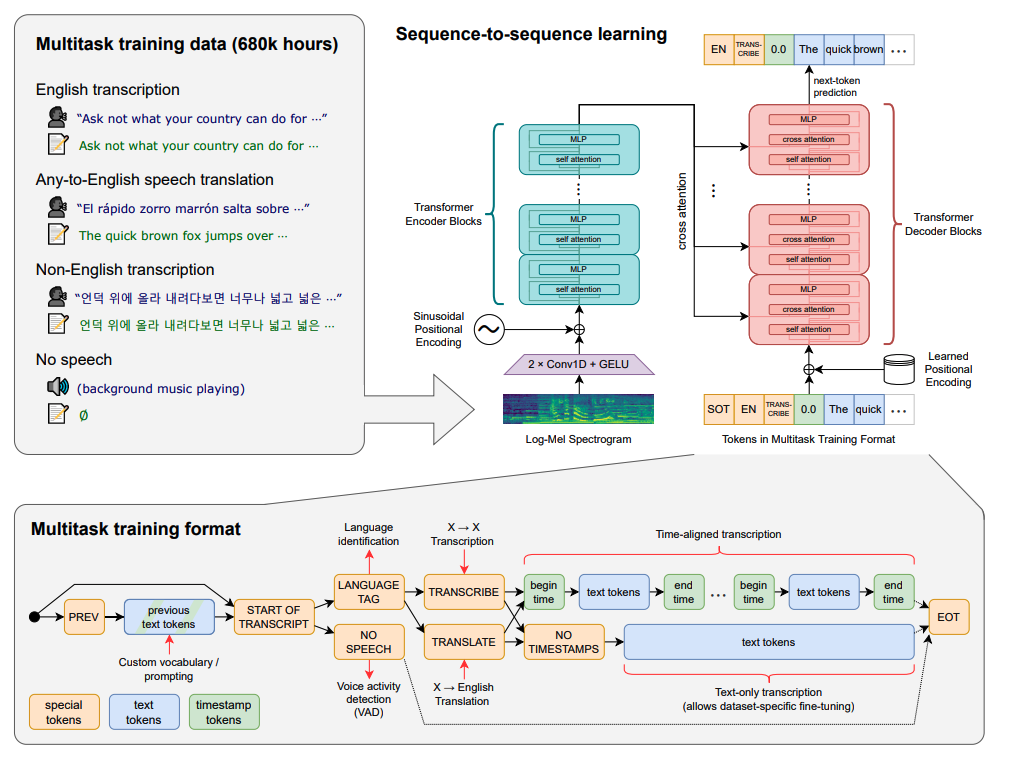

In [1]:
import nlu
whisper = nlu.load('xx.speech2text.whisper.tiny')
whisper

asr_whisper_tiny download started this may take some time.
Approximate size to download 149.4 MB
[OK!]


{'whisper_for_ctc': WhisperForCTC_b48195b5aa99,
 'audio_assembler': AudioAssembler_fd42e8825a2b}

In [2]:
asr_df = whisper.predict('my_recording.wav')
asr_df

audio_series  \
0  [-3.67435859516263e-10, -3.0377123039215803e-1...   

                                                text  
0   Run the cell to record your voice. It will be...

In [3]:
asr_df = whisper.predict('my_recording2.wav')
asr_df.text.values[0]

' There are hundreds of models for dozens of languages. You can play around with. Check them out.'

## Try out other models

 There are many more wav2vec, wav2vec2, hubert, whisper and other models for ASR

 You can try any of them out by simply chaning the parameter of `nlu.load('my_model')` to the one you want to test.


Refer to the [modelshub](https://nlp.johnsnowlabs.com/models?task=Automatic+Speech+Recognition) for the full list

| Language   | NLU Reference                                                                                                                                                                                  | Spark NLP  Reference                                                                                                                                                                       | Annotator Class   |
|:-----------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------|
| ab         | [ab.speech2text.wav2vec2](https://nlp.johnsnowlabs.com/2022/09/24/asr_hf_challenge_test_ab.html)                                                                                               | [asr_hf_challenge_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_hf_challenge_test_ab.html)                                                                                             | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.base](https://nlp.johnsnowlabs.com/2022/09/24/asr_baseline_ab.html)                                                                                                   | [asr_baseline](https://nlp.johnsnowlabs.com/2022/09/24/asr_baseline_ab.html)                                                                                                               | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_baseline_gpu_ab.html)                                                                                           | [asr_baseline_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_baseline_gpu_ab.html)                                                                                                       | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.by_mofe](https://nlp.johnsnowlabs.com/2022/09/24/asr_speech_sprint_test_ab.html)                                                                                      | [asr_speech_sprint_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_speech_sprint_test_ab.html)                                                                                           | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_hf_challenge_test_gpu_ab.html)                                                                                       | [asr_hf_challenge_test_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_hf_challenge_test_gpu_ab.html)                                                                                     | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_common_voice_ab_demo_ab.html)                                                                                | [asr_wav2vec2_common_voice_ab_demo](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_common_voice_ab_demo_ab.html)                                                                     | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_ab_demo_gpu_ab.html)                                                                        | [asr_wav2vec2_common_voice_ab_demo_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_ab_demo_gpu_ab.html)                                                             | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xls](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_test_ab.html)                                                                                                     | [asr_xls_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_test_ab.html)                                                                                                               | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_spanish_ab.html)                                                                                            | [asr_xls_r_ab_spanish](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_spanish_ab.html)                                                                                               | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_baaastien](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_baaastien_ab.html)                                                                     | [asr_xls_r_ab_test_by_baaastien](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_baaastien_ab.html)                                                                           | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_cahya_ab.html)                                                                             | [asr_xls_r_ab_test_by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_cahya_ab.html)                                                                                   | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_chmanoj](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_demo_test_ab.html)                                                                                  | [asr_xls_r_demo_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_demo_test_ab.html)                                                                                                 | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_hf_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_hf_test_ab.html)                                                                         | [asr_xls_r_ab_test_by_hf_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_hf_test_ab.html)                                                                               | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_mattchurgin](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_eng_ab.html)                                                                                    | [asr_xls_r_eng](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_eng_ab.html)                                                                                                             | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_muneson](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_muneson_ab.html)                                                                         | [asr_xls_r_ab_test_by_muneson](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_muneson_ab.html)                                                                               | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.by_pablouribe](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_pablouribe_ab.html)                                                                   | [asr_xls_r_ab_test_by_pablouribe](https://nlp.johnsnowlabs.com/2022/09/24/asr_xls_r_ab_test_by_pablouribe_ab.html)                                                                         | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_spanish_gpu_ab.html)                                                                                    | [asr_xls_r_ab_spanish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_spanish_gpu_ab.html)                                                                                       | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu.by_cahya](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_cahya_gpu_ab.html)                                                                     | [asr_xls_r_ab_test_by_cahya_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_cahya_gpu_ab.html)                                                                           | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu.by_chmanoj](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_demo_test_gpu_ab.html)                                                                          | [asr_xls_r_demo_test_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_demo_test_gpu_ab.html)                                                                                         | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu.by_hf_test](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_hf_test_gpu_ab.html)                                                                 | [asr_xls_r_ab_test_by_hf_test_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_hf_test_gpu_ab.html)                                                                       | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu.by_mattchurgin](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_eng_gpu_ab.html)                                                                            | [asr_xls_r_eng_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_eng_gpu_ab.html)                                                                                                     | Wav2Vec2ForCTC    |
| ab         | [ab.speech2text.wav2vec_xlsr.gpu.by_pablouribe](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_pablouribe_gpu_ab.html)                                                           | [asr_xls_r_ab_test_by_pablouribe_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_ab_test_by_pablouribe_gpu_ab.html)                                                                 | Wav2Vec2ForCTC    |
| ba         | [ba.speech2text.wav2vec_xlsr.v2_large_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt_ba.html)                                                     | [asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt_ba.html)                                             | Wav2Vec2ForCTC    |
| ba         | [ba.speech2text.wav2vec_xlsr.v2_large_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt_gpu_ba.html)                                             | [asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_bashkir_cv7_opt_gpu_ba.html)                                     | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_1b_bemba_fds_bem.html)                                                                | [asr_wav2vec2_large_xls_r_1b_bemba_fds](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_1b_bemba_fds_bem.html)                                                            | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large.by_csikasote](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_bemba_bem.html)                                                           | [asr_wav2vec2_large_xlsr_bemba](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_bemba_bem.html)                                                                            | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_bemba_fds_bem.html)                                                         | [asr_wav2vec2_large_xls_r_300m_bemba_fds](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_bemba_fds_bem.html)                                                        | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_bemba_fds_gpu_bem.html)                                                 | [asr_wav2vec2_large_xls_r_300m_bemba_fds_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_bemba_fds_gpu_bem.html)                                                | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_1b_bemba_fds_gpu_bem.html)                                                        | [asr_wav2vec2_large_xls_r_1b_bemba_fds_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_1b_bemba_fds_gpu_bem.html)                                                    | Wav2Vec2ForCTC    |
| bem        | [bem.speech2text.wav2vec_xlsr.v2_large_gpu.by_csikasote](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_bemba_gpu_bem.html)                                                   | [asr_wav2vec2_large_xlsr_bemba_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_bemba_gpu_bem.html)                                                                    | Wav2Vec2ForCTC    |
| bg         | [bg.speech2text.wav2vec_xlsr.v2_large_300m](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_d2_bg.html)                                                                  | [asr_wav2vec2_large_xls_r_300m_d2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_d2_bg.html)                                                                       | Wav2Vec2ForCTC    |
| bg         | [bg.speech2text.wav2vec_xlsr.v2_large_300m_d2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_d2_gpu_bg.html)                                                       | [asr_wav2vec2_large_xls_r_300m_d2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_d2_gpu_bg.html)                                                               | Wav2Vec2ForCTC    |
| ca         | [ca.speech2text.wav2vec2.voxpopuli.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly_ca.html)                                            | [asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly_ca.html)                             | Wav2Vec2ForCTC    |
| ca         | [ca.speech2text.wav2vec2.voxpopuli.v2_large.by_softcatala](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala_ca.html)                             | [asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala_ca.html)                           | Wav2Vec2ForCTC    |
| ca         | [ca.speech2text.wav2vec2.voxpopuli.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly_gpu_ca.html)                                    | [asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_100k_voxpopuli_catala_by_ccoreilly_gpu_ca.html)                     | Wav2Vec2ForCTC    |
| ca         | [ca.speech2text.wav2vec2.voxpopuli.v2_large_gpu.by_softcatala](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala_gpu_ca.html)                     | [asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_100k_voxpopuli_catala_by_softcatala_gpu_ca.html)                   | Wav2Vec2ForCTC    |
| cs         | [cs.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_250_cs.html)                                                                             | [asr_wav2vec2_xls_r_300m_250](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_250_cs.html)                                                                                 | Wav2Vec2ForCTC    |
| cs         | [cs.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_250_gpu_cs.html)                                                                     | [asr_wav2vec2_xls_r_300m_250_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_250_gpu_cs.html)                                                                         | Wav2Vec2ForCTC    |
| cs         | [cs.speech2text.wav2vec_xlsr.v2_large.by_arampacha](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_czech_cs.html)                                                             | [asr_wav2vec2_large_xlsr_czech](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_czech_cs.html)                                                                             | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec2.v2_base](https://nlp.johnsnowlabs.com/2022/09/25/asr_alvenir_wav2vec2_base_nst_cv9_da.html)                                                                           | [asr_alvenir_wav2vec2_base_nst_cv9](https://nlp.johnsnowlabs.com/2022/09/25/asr_alvenir_wav2vec2_base_nst_cv9_da.html)                                                                     | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec2.v2_base.by_alvenir](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_nst_da.html)                                                                            | [asr_wav2vec2_base_nst](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_nst_da.html)                                                                                             | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_nst_gpu_da.html)                                                                               | [asr_wav2vec2_base_nst_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_nst_gpu_da.html)                                                                                     | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec_xlsr.300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_danish_nst_cv9_da.html)                                                                              | [asr_xls_r_300m_danish_nst_cv9](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_danish_nst_cv9_da.html)                                                                             | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec_xlsr.300m.by_chcaa](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_nst_cv9_da.html)                                                                            | [asr_xls_r_300m_nst_cv9](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_nst_cv9_da.html)                                                                                           | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec_xlsr.300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_nst_cv9_gpu_da.html)                                                                             | [asr_xls_r_300m_nst_cv9_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_nst_cv9_gpu_da.html)                                                                                   | Wav2Vec2ForCTC    |
| da         | [da.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_ftspeech_da.html)                                                                        | [asr_wav2vec2_xls_r_300m_ftspeech](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_ftspeech_da.html)                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_base](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_german_de.html)                                                                                    | [asr_wav2vec2_base_german](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_german_de.html)                                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_base.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_german_cv9_de.html)                                                                  | [asr_wav2vec2_base_german_cv9](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_german_cv9_de.html)                                                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_german_cv9_gpu_de.html)                                                                        | [asr_wav2vec2_base_german_cv9_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_german_cv9_gpu_de.html)                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_base_gpu.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_german_gpu_de.html)                                                                | [asr_wav2vec2_base_german_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_german_gpu_de.html)                                                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s103_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s377_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s37_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s37_gpu_de.html)                                                                     | [asr_exp_w2v2t_r_wav2vec2_s37_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s37_gpu_de.html)                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s3_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3_gpu_de.html)                                            | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3_gpu_de.html)                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s445_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445_gpu_de.html)                                        | [asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445_gpu_de.html)                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s460_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s460_gpu_de.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s460_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s460_gpu_de.html)                                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s466_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s466_gpu_de.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s466_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s466_gpu_de.html)                                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s468_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468_gpu_de.html)                                        | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468_gpu_de.html)                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s527_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s545_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s627_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s627_gpu_de.html)                                                                   | [asr_exp_w2v2t_vp_100k_s627_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s627_gpu_de.html)                                                                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s732_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732_gpu_de.html)                                        | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732_gpu_de.html)                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s756_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s779_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779_gpu_de.html)                                       | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779_gpu_de.html)                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s803_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803_gpu_de.html)                                        | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803_gpu_de.html)                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s957_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957_gpu_de.html)                                        | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957_gpu_de.html)                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s95_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95_gpu_de.html)                                          | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s962_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s962_gpu_de.html)                                                                        | [asr_exp_w2v2t_vp_s962_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s962_gpu_de.html)                                                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_gpu_s982_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s982_gpu_de.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s982_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s982_gpu_de.html)                                                                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s103_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s103_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s184_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s184_de.html)                                                                                | [asr_exp_w2v2t_vp_s184](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s184_de.html)                                                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s377_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s377_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s37_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s37_de.html)                                                                             | [asr_exp_w2v2t_r_wav2vec2_s37](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s37_de.html)                                                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s3_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3_de.html)                                                    | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s3_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s445_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445_de.html)                                                | [asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_8_austria_2_s445_de.html)                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s460_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s460_de.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s460](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s460_de.html)                                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s466_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s466_de.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s466](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s466_de.html)                                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s468_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468_de.html)                                                | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s468_de.html)                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s527_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s527_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s545_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s545_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s627_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s627_de.html)                                                                           | [asr_exp_w2v2t_vp_100k_s627](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s627_de.html)                                                                                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s732_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732_de.html)                                                | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s732_de.html)                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s756_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_0_austria_10_s756_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s779_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779_de.html)                                               | [asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_10_austria_0_s779_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s803_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803_de.html)                                                | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s803_de.html)                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s946_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s946_de.html)                                                                                | [asr_exp_w2v2t_vp_s946](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s946_de.html)                                                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s957_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957_de.html)                                                | [asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_2_austria_8_s957_de.html)                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s95_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95_de.html)                                                  | [asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_germany_5_austria_5_s95_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s962_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s962_de.html)                                                                                | [asr_exp_w2v2t_vp_s962](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s962_de.html)                                                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec2.v2_s982_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s982_de.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s982](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s982_de.html)                                                                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s204_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204_gpu_de.html)                         | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204_gpu_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s896_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896_gpu_de.html)                          | [asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896_gpu_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.gender_male_female.v2_s204_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204_de.html)                                 | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s204_de.html)                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.gender_male_female.v2_s896_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896_de.html)                                  | [asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_5_female_5_s896_de.html)                                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.gender_male_female.v2_s922_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_0_female_10_s922_de.html)                                 | [asr_exp_w2v2r_xls_r_gender_male_0_female_10_s922](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_0_female_10_s922_de.html)                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_english_by_aware_ai_de.html)                                                             | [asr_wav2vec2_xls_r_300m_english_by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_english_by_aware_ai_de.html)                                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_english_by_aware_ai_gpu_de.html)                                                     | [asr_wav2vec2_xls_r_300m_english_by_aware_ai_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_english_by_aware_ai_gpu_de.html)                                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s143_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s143_gpu_de.html)                                                                    | [asr_exp_w2v2t_xls_r_s143_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s143_gpu_de.html)                                                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s350_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350_gpu_de.html)                                        | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s381_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381_gpu_de.html)                                        | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s412_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412_gpu_de.html)                                         | [asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412_gpu_de.html)                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s42_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42_gpu_de.html)                                           | [asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42_gpu_de.html)                           | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s438_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s438_gpu_de.html)                                                                    | [asr_exp_w2v2t_xls_r_s438_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s438_gpu_de.html)                                                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s458_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458_gpu_de.html)                                         | [asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458_gpu_de.html)                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s534_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534_gpu_de.html)                                         | [asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534_gpu_de.html)                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s543_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543_gpu_de.html)                                         | [asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543_gpu_de.html)                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s673_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673_gpu_de.html)                                        | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s728_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728_gpu_de.html)                                        | [asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_gpu_s886_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886_gpu_de.html)                                        | [asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886_gpu_de.html)                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_german_by_facebook_de.html)                                                          | [asr_wav2vec2_large_xlsr_53_german_by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_german_by_facebook_de.html)                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_with_lm_de.html)                                                  | [asr_wav2vec2_large_xlsr_53_german_with_lm](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_with_lm_de.html)                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_jonatasgrosman_de.html)                                  | [asr_wav2vec2_large_xlsr_53_german_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_jonatasgrosman_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large.by_marcel](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_marcel_de.html)                                                  | [asr_wav2vec2_large_xlsr_53_german_by_marcel](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_marcel_de.html)                                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large.by_maxidl](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_german_by_maxidl_de.html)                                                     | [asr_wav2vec2_large_xlsr_german_by_maxidl](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_german_by_maxidl_de.html)                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_oliverguhr_de.html)                                          | [asr_wav2vec2_large_xlsr_53_german_by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_by_oliverguhr_de.html)                                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_cv8.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_cv8_de.html)                                                | [asr_wav2vec2_large_xlsr_53_german_cv8](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_cv8_de.html)                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_cv8_gpu.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_cv8_gpu_de.html)                                        | [asr_wav2vec2_large_xlsr_53_german_cv8_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_cv8_gpu_de.html)                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_cv9.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_cv9_de.html)                                                | [asr_wav2vec2_large_xlsr_53_german_cv9](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_german_cv9_de.html)                                                             | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_cv9_gpu.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_cv9_gpu_de.html)                                        | [asr_wav2vec2_large_xlsr_53_german_cv9_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_cv9_gpu_de.html)                                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_facebook_gpu_de.html)                                      | [asr_wav2vec2_large_xlsr_53_german_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_facebook_gpu_de.html)                                     | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_gpu.by_marcel](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_marcel_gpu_de.html)                                          | [asr_wav2vec2_large_xlsr_53_german_by_marcel_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_marcel_gpu_de.html)                                         | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_gpu.by_maxidl](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_german_by_maxidl_gpu_de.html)                                             | [asr_wav2vec2_large_xlsr_german_by_maxidl_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_german_by_maxidl_gpu_de.html)                                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_large_gpu.by_oliverguhr](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_oliverguhr_gpu_de.html)                                  | [asr_wav2vec2_large_xlsr_53_german_by_oliverguhr_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_german_by_oliverguhr_gpu_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s143_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s143_de.html)                                                                            | [asr_exp_w2v2t_xls_r_s143](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s143_de.html)                                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s295_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s295_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s295](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s295_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s350_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s350_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s368_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s368_de.html)                                                 | [asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s368](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s368_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s381_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s381_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s412_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412_de.html)                                                 | [asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s412_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s42_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42_de.html)                                                   | [asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_8_austria_2_s42_de.html)                                   | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s438_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s438_de.html)                                                                            | [asr_exp_w2v2t_xls_r_s438](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s438_de.html)                                                                                       | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s458_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458_de.html)                                                 | [asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s458_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s534_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534_de.html)                                                 | [asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_5_austria_5_s534_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s543_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543_de.html)                                                 | [asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_2_austria_8_s543_de.html)                                 | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s673_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_0_austria_10_s673_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s728_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s728_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v2_s886_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886_de.html)                                                | [asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_accent_germany_10_austria_0_s886_de.html)                               | Wav2Vec2ForCTC    |
| de         | [de.speech2text.wav2vec_xlsr.v3_large.by_marcel](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_german_demo_de.html)                                                          | [asr_wav2vec2_large_xlsr_german_demo](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_german_demo_de.html)                                                                 | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec2](https://nlp.johnsnowlabs.com/2022/09/25/asr_greek_lsr_1_el.html)                                                                                                     | [asr_greek_lsr_1](https://nlp.johnsnowlabs.com/2022/09/25/asr_greek_lsr_1_el.html)                                                                                                         | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_53_wav2vec_greek_el.html)                                                                                    | [asr_xlsr_53_wav2vec_greek](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_53_wav2vec_greek_el.html)                                                                                     | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large.by_bagus](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_bahasa_indonesia_el.html)                                                      | [asr_wav2vec2_large_xlsr_bahasa_indonesia](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_bahasa_indonesia_el.html)                                                       | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_jonatasgrosman_el.html)                                   | [asr_wav2vec2_large_xlsr_53_greek_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_jonatasgrosman_el.html)                                   | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large.by_lighteternal](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_lighteternal_el.html)                                       | [asr_wav2vec2_large_xlsr_53_greek_by_lighteternal](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_lighteternal_el.html)                                       | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large.by_skylord](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_greek_1_el.html)                                                             | [asr_wav2vec2_large_xlsr_greek_1](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_greek_1_el.html)                                                                         | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large.by_vasilis](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_vasilis_el.html)                                                 | [asr_wav2vec2_large_xlsr_53_greek_by_vasilis](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_greek_by_vasilis_el.html)                                                 | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large_gpu.by_bagus](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_bahasa_indonesia_gpu_el.html)                                              | [asr_wav2vec2_large_xlsr_bahasa_indonesia_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_bahasa_indonesia_gpu_el.html)                                               | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large_gpu.by_lighteternal](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_greek_by_lighteternal_gpu_el.html)                               | [asr_wav2vec2_large_xlsr_53_greek_by_lighteternal_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_greek_by_lighteternal_gpu_el.html)                               | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v2_large_gpu.by_skylord](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_greek_1_gpu_el.html)                                                     | [asr_wav2vec2_large_xlsr_greek_1_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_greek_1_gpu_el.html)                                                                 | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v3_large.by_skylord](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_greek_2_el.html)                                                             | [asr_wav2vec2_large_xlsr_greek_2](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_greek_2_el.html)                                                                         | Wav2Vec2ForCTC    |
| el         | [el.speech2text.wav2vec_xlsr.v3_large_gpu.by_skylord](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_greek_2_gpu_el.html)                                                     | [asr_wav2vec2_large_xlsr_greek_2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_greek_2_gpu_el.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.accents.wav2vec2.v2.by_willcai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_3_en.html)                                                           | [asr_wav2vec2_common_voice_accents_3](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_3_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.accents_indian.wav2vec2.v2.by_willcai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_indian_en.html)                                               | [asr_wav2vec2_common_voice_accents_indian](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_indian_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.bilal.wav2vec2.v2.by_roshana](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_bilal_2022_en.html)                                                                         | [asr_wav2vec2_bilal_2022](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_bilal_2022_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.cetuc_sid_voxforge.wav2vec2.v2_mls0.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_cetuc_sid_voxforge_mls_0_en.html)                                   | [asr_wav2vec2_cetuc_sid_voxforge_mls_0](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_cetuc_sid_voxforge_mls_0_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.cetuc_sid_voxforge.wav2vec2.v2_mls1.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_cetuc_sid_voxforge_mls_1_en.html)                                   | [asr_wav2vec2_cetuc_sid_voxforge_mls_1](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_cetuc_sid_voxforge_mls_1_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.coralwav2vec2.v2.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_coral_300ep_en.html)                                                                   | [asr_wav2vec2_coral_300ep](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_coral_300ep_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.aa_v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_a_gpu_en.html)                                                                            | [asr_wav2vec2_large_a_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_a_gpu_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.accents.v2_gpu.by_willcai](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_accents_3_gpu_en.html)                                                   | [asr_wav2vec2_common_voice_accents_3_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_accents_3_gpu_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.bilal.v2_gpu.by_roshana](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_2022_gpu_en.html)                                                                 | [asr_wav2vec2_bilal_2022_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_2022_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_abhishek](https://nlp.johnsnowlabs.com/2022/09/26/asr_autonlp_hindi_asr_en.html)                                                                                   | [asr_autonlp_hindi_asr](https://nlp.johnsnowlabs.com/2022/09/26/asr_autonlp_hindi_asr_en.html)                                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_behroz](https://nlp.johnsnowlabs.com/2022/09/24/asr_sp_proj_en.html)                                                                                               | [asr_sp_proj](https://nlp.johnsnowlabs.com/2022/09/24/asr_sp_proj_en.html)                                                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/25/asr_liepa_lithuanian_en.html)                                                                                 | [asr_liepa_lithuanian](https://nlp.johnsnowlabs.com/2022/09/25/asr_liepa_lithuanian_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_bkh6722](https://nlp.johnsnowlabs.com/2022/09/25/asr_bach_arb_en.html)                                                                                             | [asr_bach_arb](https://nlp.johnsnowlabs.com/2022/09/25/asr_bach_arb_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_buidung2004](https://nlp.johnsnowlabs.com/2022/09/24/asr_maialong_model_en.html)                                                                                   | [asr_maialong_model](https://nlp.johnsnowlabs.com/2022/09/24/asr_maialong_model_en.html)                                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_denden](https://nlp.johnsnowlabs.com/2022/09/25/asr_iloko_en.html)                                                                                                 | [asr_iloko](https://nlp.johnsnowlabs.com/2022/09/25/asr_iloko_en.html)                                                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_fractalego](https://nlp.johnsnowlabs.com/2022/09/26/asr_personal_speech_text_model_en.html)                                                                        | [asr_personal_speech_text_model](https://nlp.johnsnowlabs.com/2022/09/26/asr_personal_speech_text_model_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_hf_internal_testing](https://nlp.johnsnowlabs.com/2022/09/24/asr_processor_with_lm_en.html)                                                                        | [asr_processor_with_lm](https://nlp.johnsnowlabs.com/2022/09/24/asr_processor_with_lm_en.html)                                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_lilitket](https://nlp.johnsnowlabs.com/2022/09/25/asr_20220507_122935_en.html)                                                                                     | [asr_20220507_122935](https://nlp.johnsnowlabs.com/2022/09/25/asr_20220507_122935_en.html)                                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_tarakki100](https://nlp.johnsnowlabs.com/2022/09/25/asr_sanskrit_en.html)                                                                                          | [asr_sanskrit](https://nlp.johnsnowlabs.com/2022/09/25/asr_sanskrit_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/25/asr_temp_en.html)                                                                                               | [asr_temp](https://nlp.johnsnowlabs.com/2022/09/25/asr_temp_en.html)                                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.crypto.v2_finetuned](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec_finetuned_on_cryptocurrency_en.html)                                                         | [asr_wav2vec_finetuned_on_cryptocurrency](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec_finetuned_on_cryptocurrency_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.crypto.v2_finetuned_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec_finetuned_on_cryptocurrency_gpu_en.html)                                                 | [asr_wav2vec_finetuned_on_cryptocurrency_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec_finetuned_on_cryptocurrency_gpu_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.distilled_v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_distil_wav2vec2_en.html)                                                                                    | [asr_distil_wav2vec2](https://nlp.johnsnowlabs.com/2022/09/24/asr_distil_wav2vec2_en.html)                                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.distilled_v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_distil_wav2vec2_gpu_en.html)                                                                            | [asr_distil_wav2vec2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_distil_wav2vec2_gpu_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.finetuned](https://nlp.johnsnowlabs.com/2022/09/25/asr_finetuned_audio_transcriber_en.html)                                                                           | [asr_finetuned_audio_transcriber](https://nlp.johnsnowlabs.com/2022/09/25/asr_finetuned_audio_transcriber_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_abhishek](https://nlp.johnsnowlabs.com/2022/09/25/asr_autonlp_hindi_asr_gpu_en.html)                                                                           | [asr_autonlp_hindi_asr_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_autonlp_hindi_asr_gpu_en.html)                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_behroz](https://nlp.johnsnowlabs.com/2022/09/26/asr_sp_proj_gpu_en.html)                                                                                       | [asr_sp_proj_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_sp_proj_gpu_en.html)                                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/26/asr_liepa_lithuanian_gpu_en.html)                                                                         | [asr_liepa_lithuanian_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_liepa_lithuanian_gpu_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_bkh6722](https://nlp.johnsnowlabs.com/2022/09/26/asr_bach_arb_gpu_en.html)                                                                                     | [asr_bach_arb_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_bach_arb_gpu_en.html)                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_buidung2004](https://nlp.johnsnowlabs.com/2022/09/26/asr_maialong_model_gpu_en.html)                                                                           | [asr_maialong_model_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_maialong_model_gpu_en.html)                                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_denden](https://nlp.johnsnowlabs.com/2022/09/26/asr_iloko_gpu_en.html)                                                                                         | [asr_iloko_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_iloko_gpu_en.html)                                                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_fractalego](https://nlp.johnsnowlabs.com/2022/09/25/asr_personal_speech_text_model_gpu_en.html)                                                                | [asr_personal_speech_text_model_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_personal_speech_text_model_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_hf_internal_testing](https://nlp.johnsnowlabs.com/2022/09/25/asr_processor_with_lm_gpu_en.html)                                                                | [asr_processor_with_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_processor_with_lm_gpu_en.html)                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_sid_voxforge_cetuc_1_gpu_en.html)                                                             | [asr_model_sid_voxforge_cetuc_1_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_sid_voxforge_cetuc_1_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_tarakki100](https://nlp.johnsnowlabs.com/2022/09/25/asr_sanskrit_gpu_en.html)                                                                                  | [asr_sanskrit_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_sanskrit_gpu_en.html)                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/26/asr_temp_gpu_en.html)                                                                                       | [asr_temp_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_temp_gpu_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.v1.by_niclas](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_2_gpu_en.html)                                                                                    | [asr_model_2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_2_gpu_en.html)                                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.v2.by_niclas](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_4_gpu_en.html)                                                                                    | [asr_model_4_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_model_4_gpu_en.html)                                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gpu.v3.by_niclas](https://nlp.johnsnowlabs.com/2022/09/26/asr_models_6_gpu_en.html)                                                                                   | [asr_models_6_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_models_6_gpu_en.html)                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.gram.v2_base_100h_gpu.by_saahith](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_ngram_gpu_en.html)                                                   | [asr_wav2vec2_base_100h_ngram_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_ngram_gpu_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.indian.v2_gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_indian_english_enm_700_gpu_en.html)                                     | [asr_vakyansh_wav2vec2_indian_english_enm_700_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_indian_english_enm_700_gpu_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.indian_accents.v2_gpu.by_willcai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_indian_gpu_en.html)                                       | [asr_wav2vec2_common_voice_accents_indian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_accents_indian_gpu_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.ksponspeech.v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ksponspeech_en.html)                                                                             | [asr_wav2vec2_ksponspeech](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ksponspeech_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.ksponspeech.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ksponspeech_gpu_en.html)                                                                     | [asr_wav2vec2_ksponspeech_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ksponspeech_gpu_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.libri.v2_large_960h.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_libri_960h_en.html)                                                | [asr_wav2vec2_large_robust_libri_960h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_libri_960h_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.maithili.v2.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_maithili_maim_50_en.html)                                                 | [asr_vakyansh_wav2vec2_maithili_maim_50](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_maithili_maim_50_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.maithili.v2_gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_maithili_maim_50_gpu_en.html)                                         | [asr_vakyansh_wav2vec2_maithili_maim_50_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_maithili_maim_50_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.murad.v2_data_gpu.by_mbmmurad](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_with_some_data_gpu_en.html)                                                 | [asr_wav2vec2_murad_with_some_data_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_with_some_data_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.murad.v2_gpu.by_mbmmurad](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_gpu_en.html)                                                                     | [asr_wav2vec2_murad_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_gpu_en.html)                                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.ngram.v2_base_100h.by_saahith](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_ngram_en.html)                                                          | [asr_wav2vec2_base_100h_ngram](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_ngram_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.sanskrit.v2.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/26/asr_vakyansh_wav2vec2_sanskrit_sam_60_en.html)                                                  | [asr_vakyansh_wav2vec2_sanskrit_sam_60](https://nlp.johnsnowlabs.com/2022/09/26/asr_vakyansh_wav2vec2_sanskrit_sam_60_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.sanskrit.v2_gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_sanskrit_sam_60_gpu_en.html)                                          | [asr_vakyansh_wav2vec2_sanskrit_sam_60_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_sanskrit_sam_60_gpu_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.telgu.v2_gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_telugu_tem_100_gpu_en.html)                                              | [asr_vakyansh_wav2vec2_telugu_tem_100_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_telugu_tem_100_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.test.v2_base_100h.by_saahith](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_test_en.html)                                                            | [asr_wav2vec2_base_100h_test](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_test_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.test.v2_base_100h_gpu.by_saahith](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_test_gpu_en.html)                                                    | [asr_wav2vec2_base_100h_test_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_test_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_asr_en.html)                                                                           | [asr_wav2vec2_base_timit_asr](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_asr_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_by_patrickvonplaten_en.html)                                  | [asr_wav2vec2_base_timit_demo_by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_by_patrickvonplaten_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base.by_prows12](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_test_jong_en.html)                                                     | [asr_wav2vec2_base_timit_demo_test_jong](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_test_jong_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base.by_shields](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_20sec_timit_and_dementiabank_en.html)                                             | [asr_wav2vec2_base_20sec_timit_and_dementiabank](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_20sec_timit_and_dementiabank_en.html)                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_32d_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_32_epochs30_en.html)                                              | [asr_wav2vec2_base_timit_demo_colab_32_epochs30](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_32_epochs30_en.html)                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_32d_colab.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop_en.html)                       | [asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop_en.html)                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_32d_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_32_epochs30_gpu_en.html)                                      | [asr_wav2vec2_base_timit_demo_colab_32_epochs30_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_32_epochs30_gpu_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_32d_gpu_colab.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop_gpu_en.html)               | [asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_32_epochs50_earlystop_gpu_en.html)               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_adverse_drug_event_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu_en.html)                        | [asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_adverse_drug_event_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu_gpu_en.html)                | [asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_adelgalu_gpu_en.html)                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_ali221000262](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_ali221000262_en.html)                              | [asr_wav2vec2_base_timit_demo_colab_by_ali221000262](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_ali221000262_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_anan0329](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_anan0329_en.html)                                      | [asr_wav2vec2_base_timit_demo_colab_by_anan0329](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_anan0329_en.html)                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_1_by_doddle124578_en.html)                            | [asr_wav2vec2_base_timit_demo_colab_1_by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_1_by_doddle124578_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_gullenasatish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_gullenasatish_en.html)                            | [asr_wav2vec2_base_timit_demo_colab_by_gullenasatish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_gullenasatish_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_hady](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_hady_en.html)                                              | [asr_wav2vec2_base_timit_demo_colab_by_hady](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_hady_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson_en.html)                            | [asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_jessiejohnson](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson_en.html)                            | [asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_ntp0102](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_ntp0102_en.html)                                        | [asr_wav2vec2_base_timit_demo_colab_by_ntp0102](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_ntp0102_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten_en.html)               | [asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten_en.html)             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_radhakri119](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_radhakri119_en.html)                                | [asr_wav2vec2_base_timit_demo_colab_by_radhakri119](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_radhakri119_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_samantharhay](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_samantharhay_en.html)                              | [asr_wav2vec2_base_timit_demo_colab_by_samantharhay](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_samantharhay_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_terri1102](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_terri1102_en.html)                                    | [asr_wav2vec2_base_timit_demo_colab_by_terri1102](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_terri1102_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_testimonial](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_testimonial_en.html)                                | [asr_wav2vec2_base_timit_demo_colab_by_testimonial](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_testimonial_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_tingtingyuli](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli_en.html)                              | [asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_test_en.html)                                            | [asr_wav2vec2_base_timit_demo_colab_test](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_colab_test_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab0](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken_en.html)                                     | [asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab0.by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_hassnain_en.html)                                    | [asr_wav2vec2_base_timit_demo_colab0_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_hassnain_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab0.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_sherry7144_en.html)                                | [asr_wav2vec2_base_timit_demo_colab0_by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_sherry7144_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab0.by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_tahazakir_en.html)                                  | [asr_wav2vec2_base_timit_demo_colab0_by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab0_by_tahazakir_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab1](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken_en.html)                                     | [asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab1.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_sherry7144_en.html)                                | [asr_wav2vec2_base_timit_demo_colab1_by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_sherry7144_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab1.by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_tahazakir_en.html)                                  | [asr_wav2vec2_base_timit_demo_colab1_by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab1_by_tahazakir_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab10](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab10_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab10](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab10_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab11](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab11_by_sameearif88_en.html)                                           | [asr_wav2vec2_base_timit_demo_colab11_by_sameearif88](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab11_by_sameearif88_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_ahmad573_en.html)                                                | [asr_wav2vec2_base_timit_demo_colab2_by_ahmad573](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_ahmad573_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab2.by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_hassnain_en.html)                                    | [asr_wav2vec2_base_timit_demo_colab2_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_hassnain_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab2.by_sameearif88](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_sameearif88_en.html)                              | [asr_wav2vec2_base_timit_demo_colab2_by_sameearif88](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_sameearif88_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab2.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_sherry7144_en.html)                                | [asr_wav2vec2_base_timit_demo_colab2_by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab2_by_sherry7144_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab240](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab240_en.html)                                                        | [asr_wav2vec2_base_timit_demo_colab240](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab240_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab3](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab3_by_hassnain_en.html)                                                | [asr_wav2vec2_base_timit_demo_colab3_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab3_by_hassnain_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab3.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab3_by_sherry7144_en.html)                                | [asr_wav2vec2_base_timit_demo_colab3_by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab3_by_sherry7144_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab30](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab30_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab30](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab30_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab4](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab4_en.html)                                                            | [asr_wav2vec2_base_timit_demo_colab4](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab4_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab40](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab40_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab40](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab40_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab50](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab50_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab50](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab50_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab51](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab51_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab51](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab51_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab52](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab52_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab52](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab52_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab53](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab53_by_hassnain_en.html)                                              | [asr_wav2vec2_base_timit_demo_colab53_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab53_by_hassnain_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab57](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab57_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab57](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab57_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab6](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab6_by_hassnain_en.html)                                                | [asr_wav2vec2_base_timit_demo_colab6_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab6_by_hassnain_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab647](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab647_en.html)                                                        | [asr_wav2vec2_base_timit_demo_colab647](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab647_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab66](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab66_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab66](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab66_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab7](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab7_by_hassnain_en.html)                                                | [asr_wav2vec2_base_timit_demo_colab7_by_hassnain](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab7_by_hassnain_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab7.by_sameearif88](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab7_by_sameearif88_en.html)                              | [asr_wav2vec2_base_timit_demo_colab7_by_sameearif88](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab7_by_sameearif88_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab70](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab70_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab70](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab70_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab9](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab9_en.html)                                                            | [asr_wav2vec2_base_timit_demo_colab9](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab9_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab90](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab90_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab90](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab90_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab92](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab92_en.html)                                                          | [asr_wav2vec2_base_timit_demo_colab92](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab92_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_colab971](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab971_en.html)                                                        | [asr_wav2vec2_base_timit_demo_colab971](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab971_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_exp1.by_moaiz237](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_exp1_en.html)                                                   | [asr_wav2vec2_base_timit_moaiz_exp1](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_exp1_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_exp2.by_moaiz237](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_exp2_en.html)                                                   | [asr_wav2vec2_base_timit_moaiz_exp2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_exp2_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_explast.by_moaiz237](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_explast_en.html)                                             | [asr_wav2vec2_base_timit_moaiz_explast](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_moaiz_explast_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_asr_gpu_en.html)                                                                   | [asr_wav2vec2_base_timit_asr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_asr_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu.by_moaiz237](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_moaiz_explast_gpu_en.html)                                             | [asr_wav2vec2_base_timit_moaiz_explast_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_moaiz_explast_gpu_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_by_patrickvonplaten_gpu_en.html)                          | [asr_wav2vec2_base_timit_demo_by_patrickvonplaten_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_timit_demo_by_patrickvonplaten_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu.by_prows12](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_test_jong_gpu_en.html)                                             | [asr_wav2vec2_base_timit_demo_test_jong_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_test_jong_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu.by_shields](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_20sec_timit_and_dementiabank_gpu_en.html)                                     | [asr_wav2vec2_base_20sec_timit_and_dementiabank_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_20sec_timit_and_dementiabank_gpu_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_anan0329](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_anan0329_gpu_en.html)                              | [asr_wav2vec2_base_timit_demo_colab_by_anan0329_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_anan0329_gpu_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_doddle124578_gpu_en.html)                      | [asr_wav2vec2_base_timit_demo_colab_by_doddle124578_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_doddle124578_gpu_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_gullenasatish](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_gullenasatish_gpu_en.html)                    | [asr_wav2vec2_base_timit_demo_colab_by_gullenasatish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_gullenasatish_gpu_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_hady](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_hady_gpu_en.html)                                      | [asr_wav2vec2_base_timit_demo_colab_by_hady_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_hady_gpu_en.html)                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson_gpu_en.html)                    | [asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_izzy_lazerson_gpu_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_jessiejohnson](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson_gpu_en.html)                    | [asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_jessiejohnson_gpu_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_ntp0102](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_ntp0102_gpu_en.html)                                | [asr_wav2vec2_base_timit_demo_colab_by_ntp0102_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_ntp0102_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten_gpu_en.html)       | [asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_google_colab_by_patrickvonplaten_gpu_en.html)     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_radhakri119](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_radhakri119_gpu_en.html)                        | [asr_wav2vec2_base_timit_demo_colab_by_radhakri119_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_radhakri119_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_samantharhay](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_samantharhay_gpu_en.html)                      | [asr_wav2vec2_base_timit_demo_colab_by_samantharhay_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_samantharhay_gpu_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_testimonial](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_testimonial_gpu_en.html)                        | [asr_wav2vec2_base_timit_demo_colab_by_testimonial_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_testimonial_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_tingtingyuli](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli_gpu_en.html)                      | [asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_by_tingtingyuli_gpu_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab.by_ying_tina](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_test_gpu_en.html)                                    | [asr_wav2vec2_base_timit_demo_colab_test_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab_test_gpu_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab0](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken_gpu_en.html)                             | [asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_cuzeverynameistaken_gpu_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab0.by_hassnain](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_hassnain_gpu_en.html)                            | [asr_wav2vec2_base_timit_demo_colab0_by_hassnain_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_hassnain_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab0.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_sherry7144_gpu_en.html)                        | [asr_wav2vec2_base_timit_demo_colab0_by_sherry7144_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_sherry7144_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab0.by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_tahazakir_gpu_en.html)                          | [asr_wav2vec2_base_timit_demo_colab0_by_tahazakir_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab0_by_tahazakir_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab1](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken_gpu_en.html)                             | [asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_cuzeverynameistaken_gpu_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab1.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_sherry7144_gpu_en.html)                        | [asr_wav2vec2_base_timit_demo_colab1_by_sherry7144_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_sherry7144_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab1.by_tahazakir](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_tahazakir_gpu_en.html)                          | [asr_wav2vec2_base_timit_demo_colab1_by_tahazakir_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab1_by_tahazakir_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab10](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab10_gpu_en.html)                                                  | [asr_wav2vec2_base_timit_demo_colab10_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab10_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab2_by_ahmad573_gpu_en.html)                                        | [asr_wav2vec2_base_timit_demo_colab2_by_ahmad573_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab2_by_ahmad573_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab2.by_sherry7144](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab2_by_sherry7144_gpu_en.html)                        | [asr_wav2vec2_base_timit_demo_colab2_by_sherry7144_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab2_by_sherry7144_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab3](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab3_by_hassnain_gpu_en.html)                                        | [asr_wav2vec2_base_timit_demo_colab3_by_hassnain_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab3_by_hassnain_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab4](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab4_gpu_en.html)                                                    | [asr_wav2vec2_base_timit_demo_colab4_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab4_gpu_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab40](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab40_gpu_en.html)                                                  | [asr_wav2vec2_base_timit_demo_colab40_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab40_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab50](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab50_gpu_en.html)                                                  | [asr_wav2vec2_base_timit_demo_colab50_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab50_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab51](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab51_gpu_en.html)                                                  | [asr_wav2vec2_base_timit_demo_colab51_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab51_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab53](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab53_by_hassnain_gpu_en.html)                                      | [asr_wav2vec2_base_timit_demo_colab53_by_hassnain_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab53_by_hassnain_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab6](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab6_by_hassnain_gpu_en.html)                                        | [asr_wav2vec2_base_timit_demo_colab6_by_hassnain_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab6_by_hassnain_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab7](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab7_by_hassnain_gpu_en.html)                                        | [asr_wav2vec2_base_timit_demo_colab7_by_hassnain_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab7_by_hassnain_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_base_gpu_colab9](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab9_gpu_en.html)                                                    | [asr_wav2vec2_base_timit_demo_colab9_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_timit_demo_colab9_gpu_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_lv60_timit_asr_en.html)                                                                    | [asr_wav2vec2_large_lv60_timit_asr](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_lv60_timit_asr_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_lv60_timit_asr_gpu_en.html)                                                            | [asr_wav2vec2_large_lv60_timit_asr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_lv60_timit_asr_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v3_base_colab.by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_2_en.html)                                            | [asr_wav2vec2_base_timit_demo_colab_2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_2_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v4_base_colab.by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_3_en.html)                                            | [asr_wav2vec2_base_timit_demo_colab_3](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_3_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.timit.v5_base_colab.by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_doddle124578_en.html)                              | [asr_wav2vec2_base_timit_demo_colab_by_doddle124578](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_timit_demo_colab_by_doddle124578_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v1.by_niclas](https://nlp.johnsnowlabs.com/2022/09/25/asr_model_2_en.html)                                                                                            | [asr_model_2](https://nlp.johnsnowlabs.com/2022/09/25/asr_model_2_en.html)                                                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_asr_with_transformers_wav2vec2_en.html)                                                                               | [asr_asr_with_transformers_wav2vec2](https://nlp.johnsnowlabs.com/2022/09/24/asr_asr_with_transformers_wav2vec2_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_ai4bharat](https://nlp.johnsnowlabs.com/2022/09/26/asr_indicwav2vec_v1_bengali_en.html)                                                                         | [asr_indicwav2vec_v1_bengali](https://nlp.johnsnowlabs.com/2022/09/26/asr_indicwav2vec_v1_bengali_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_anjulrajendrasharma](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_indian_english_en.html)                                                               | [asr_wav2vec2_indian_english](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_indian_english_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_burakyldrm](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_burak_v2.1_en.html)                                                                            | [asr_wav2vec2_burak_v2.1](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_burak_v2.1_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_gngpostalsrvc](https://nlp.johnsnowlabs.com/2022/09/26/asr_w2v2_ami_en.html)                                                                                    | [asr_w2v2_ami](https://nlp.johnsnowlabs.com/2022/09/26/asr_w2v2_ami_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_hoangbinhmta99](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_demo_en.html)                                                                               | [asr_wav2vec_demo](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_demo_en.html)                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_itaihay](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_asr_swbd_en.html)                                                                                  | [asr_wav2vec_asr_swbd](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_asr_swbd_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_mbmmurad](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_with_some_data_en.html)                                                                    | [asr_wav2vec2_murad_with_some_data](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_murad_with_some_data_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_neelan_elucidate_ai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_tcrs_runtest_en.html)                                                                 | [asr_wav2vec2_tcrs_runtest](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_tcrs_runtest_en.html)                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_niclas](https://nlp.johnsnowlabs.com/2022/09/25/asr_model_4_en.html)                                                                                            | [asr_model_4](https://nlp.johnsnowlabs.com/2022/09/25/asr_model_4_en.html)                                                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_raffay](https://nlp.johnsnowlabs.com/2022/09/24/asr_final_wav2vec2_urdu_asr_project_en.html)                                                                    | [asr_final_wav2vec2_urdu_asr_project](https://nlp.johnsnowlabs.com/2022/09/24/asr_final_wav2vec2_urdu_asr_project_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_snehatyagi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_test_en.html)                                                                                  | [asr_wav2vec2_test](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_test_en.html)                                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_thunninoi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_japanese_hiragana_vtuber_en.html)                                                               | [asr_wav2vec2_japanese_hiragana_vtuber](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_japanese_hiragana_vtuber_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2.by_urukhan](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_russian_en.html)                                                                                  | [asr_wav2vec2_russian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_russian_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_20epoch](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_20epoch_en.html)                                                                               | [asr_wav2vec2_bilal_20epoch](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_20epoch_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_20epoch_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_20epoch_gpu_en.html)                                                                       | [asr_wav2vec2_bilal_20epoch_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_bilal_20epoch_gpu_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_ami_gpu.by_gngpostalsrvc](https://nlp.johnsnowlabs.com/2022/09/25/asr_w2v2_ami_gpu_en.html)                                                                        | [asr_w2v2_ami_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_w2v2_ami_gpu_en.html)                                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_10_en.html)                                                                             | [asr_wav2vec2_base_checkpoint_10](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_10_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base.by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_test_en.html)                                                                             | [asr_wav2vec2_base_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_test_en.html)                                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base.by_huyue012](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_cynthia_tedlium_2500_v2_en.html)                                                       | [asr_wav2vec2_base_cynthia_tedlium_2500_v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_cynthia_tedlium_2500_v2_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base.by_rjrohit](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_rj_try_5_en.html)                                                                       | [asr_wav2vec2_base_rj_try_5](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_rj_try_5_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base.by_sanchit_gandhi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_ctc_earnings22_baseline_5_gram_en.html)                                               | [asr_wav2vec2_ctc_earnings22_baseline_5_gram](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_ctc_earnings22_baseline_5_gram_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_10000.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10000_en.html)                                                                 | [asr_wav2vec2_base_10000](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10000_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_10000_gpu.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10000_gpu_en.html)                                                         | [asr_wav2vec2_base_10000_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10000_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_facebook_en.html)                                                                     | [asr_wav2vec2_base_100h_by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_facebook_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h.by_gorkemgoknar](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_with_lm_turkish_en.html)                                                 | [asr_wav2vec2_base_100h_with_lm_turkish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_with_lm_turkish_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten_en.html)                                 | [asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h.by_saahith](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_saahith_en.html)                                                   | [asr_wav2vec2_base_100h_with_lm_by_saahith](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_saahith_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h.by_vuiseng9](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_vuiseng9_en.html)                                                         | [asr_wav2vec2_base_100h_by_vuiseng9](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_vuiseng9_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_facebook_gpu_en.html)                                                             | [asr_wav2vec2_base_100h_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_100h_by_facebook_gpu_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h_gpu.by_gorkemgoknar](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_100h_with_lm_turkish_gpu_en.html)                                         | [asr_wav2vec2_base_100h_with_lm_turkish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_100h_with_lm_turkish_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h_gpu.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten_gpu_en.html)                         | [asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_patrickvonplaten_gpu_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_100h_gpu.by_saahith](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_saahith_gpu_en.html)                                           | [asr_wav2vec2_base_100h_with_lm_by_saahith_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_100h_with_lm_by_saahith_gpu_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_3percent](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent_en.html)                                    | [asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent_en.html)         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_3percent_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent_gpu_en.html)                            | [asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_3percent_gpu_en.html) | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_5percent](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent_en.html)                                    | [asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent_en.html)         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_5percent_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent_gpu_en.html)                            | [asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_swbd_turn_eos_long_short_utt_removed_5percent_gpu_en.html) | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_960h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_4_gram_en.html)                                                                          | [asr_wav2vec2_base_960h_4_gram](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_4_gram_en.html)                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_960h.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_by_facebook_en.html)                                                         | [asr_wav2vec2_base_960h_by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_by_facebook_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_960h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_by_facebook_gpu_en.html)                                                             | [asr_wav2vec2_base_960h_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_960h_by_facebook_gpu_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_960h_gpu.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_960h_4_gram_gpu_en.html)                                              | [asr_wav2vec2_base_960h_4_gram_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_960h_4_gram_gpu_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_checkpoint14.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_checkpoint_14_en.html)                                                  | [asr_wav2vec2_base_checkpoint_14](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_checkpoint_14_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_checkpoint_6.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_6_en.html)                                                   | [asr_wav2vec2_base_checkpoint_6](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_6_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_checkpoint_9.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_9_en.html)                                                   | [asr_wav2vec2_base_checkpoint_9](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_checkpoint_9_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_colab](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_common_voice_second_colab_en.html)                                                           | [asr_wav2vec2_base_common_voice_second_colab](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_common_voice_second_colab_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_colab.by_thyagosme](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_demo_colab_by_thyagosme_en.html)                                                | [asr_wav2vec2_base_demo_colab_by_thyagosme](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_demo_colab_by_thyagosme_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_finetuned](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_finetuned_spgi_speech_dev_en.html)                                                       | [asr_wav2vec2_base_finetuned_spgi_speech_dev](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_finetuned_spgi_speech_dev_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_finetuned_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_finetuned_spgi_speech_dev_gpu_en.html)                                               | [asr_wav2vec2_base_finetuned_spgi_speech_dev_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_finetuned_spgi_speech_dev_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ctc_earnings22_baseline_5_gram_gpu_en.html)                                                         | [asr_wav2vec2_ctc_earnings22_baseline_5_gram_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_ctc_earnings22_baseline_5_gram_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu.by_cahya](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_test_gpu_en.html)                                                                     | [asr_wav2vec2_base_test_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_test_gpu_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu.by_huyue012](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_cynthia_tedlium_2500_v2_gpu_en.html)                                               | [asr_wav2vec2_base_cynthia_tedlium_2500_v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_cynthia_tedlium_2500_v2_gpu_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu.by_rjrohit](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_rj_try_5_gpu_en.html)                                                               | [asr_wav2vec2_base_rj_try_5_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_rj_try_5_gpu_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu_checkpoint_6.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_checkpoint_6_gpu_en.html)                                           | [asr_wav2vec2_base_checkpoint_6_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_checkpoint_6_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu_checkpoint_9.by_jiobiala24](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_checkpoint_9_gpu_en.html)                                           | [asr_wav2vec2_base_checkpoint_9_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_checkpoint_9_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_nptel_demo_colab_gpu_en.html)                                                            | [asr_wav2vec2_base_nptel_demo_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_nptel_demo_colab_gpu_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu_colab.by_thyagosme](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_demo_colab_by_thyagosme_gpu_en.html)                                        | [asr_wav2vec2_base_demo_colab_by_thyagosme_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_demo_colab_by_thyagosme_gpu_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_base_gpu_colab.by_zoha](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_common_voice_second_colab_gpu_en.html)                                           | [asr_wav2vec2_base_common_voice_second_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_common_voice_second_colab_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_vee_demo_colab_en.html)                                                                                | [asr_wav2vec2_vee_demo_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_vee_demo_colab_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_enm700.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_indian_english_enm_700_en.html)                                             | [asr_vakyansh_wav2vec2_indian_english_enm_700](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_indian_english_enm_700_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_asr_with_transformers_wav2vec2_gpu_en.html)                                                                       | [asr_asr_with_transformers_wav2vec2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_asr_with_transformers_wav2vec2_gpu_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_ai4bharat](https://nlp.johnsnowlabs.com/2022/09/25/asr_indicwav2vec_v1_bengali_gpu_en.html)                                                                 | [asr_indicwav2vec_v1_bengali_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_indicwav2vec_v1_bengali_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_anjulrajendrasharma](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_indian_english_gpu_en.html)                                                       | [asr_wav2vec2_indian_english_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_indian_english_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_burakyldrm](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_burak_v2.1_gpu_en.html)                                                                    | [asr_wav2vec2_burak_v2.1_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_burak_v2.1_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_gngpostalsrvc](https://nlp.johnsnowlabs.com/2022/09/25/asr_w2v2_gpu_en.html)                                                                                | [asr_w2v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_w2v2_gpu_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_hoangbinhmta99](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_demo_gpu_en.html)                                                                       | [asr_wav2vec_demo_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_demo_gpu_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_itaihay](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_asr_swbd_gpu_en.html)                                                                          | [asr_wav2vec_asr_swbd_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_asr_swbd_gpu_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_coral_300ep_gpu_en.html)                                                                | [asr_wav2vec2_coral_300ep_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_coral_300ep_gpu_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_neelan_elucidate_ai](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_tcrs_runtest_gpu_en.html)                                                         | [asr_wav2vec2_tcrs_runtest_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_tcrs_runtest_gpu_en.html)                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_snehatyagi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_test_gpu_en.html)                                                                          | [asr_wav2vec2_test_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_test_gpu_en.html)                                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_thunninoi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_japanese_hiragana_vtuber_gpu_en.html)                                                       | [asr_wav2vec2_japanese_hiragana_vtuber_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_japanese_hiragana_vtuber_gpu_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu.by_urukhan](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_russian_gpu_en.html)                                                                          | [asr_wav2vec2_russian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_russian_gpu_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_vee_demo_colab_gpu_en.html)                                                                        | [asr_wav2vec2_vee_demo_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_vee_demo_colab_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_a_en.html)                                                                                       | [asr_wav2vec2_large_a](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_a_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large.by_crossdelenna](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_in_lm_en.html)                                                                   | [asr_wav2vec2_large_in_lm](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_in_lm_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_english_en.html)                                                               | [asr_wav2vec2_large_english](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_english_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large.by_prajwals](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_med_custom_train_large_en.html)                                                            | [asr_wav2vec2_med_custom_train_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_med_custom_train_large_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large.by_sanchit_gandhi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_tedlium_en.html)                                                               | [asr_wav2vec2_large_tedlium](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_tedlium_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_10m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_10min_lv60_self_en.html)                                                                     | [asr_wav2vec2_large_10min_lv60_self](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_10min_lv60_self_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_10m_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_10min_lv60_self_gpu_en.html)                                                             | [asr_wav2vec2_large_10min_lv60_self_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_10min_lv60_self_gpu_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_300h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_swbd_300h_en.html)                                                                   | [asr_wav2vec2_large_robust_swbd_300h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_swbd_300h_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_300h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_swbd_300h_gpu_en.html)                                                           | [asr_wav2vec2_large_robust_swbd_300h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_swbd_300h_gpu_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_4500h](https://nlp.johnsnowlabs.com/2022/09/24/asr_iwslt_asr_wav2vec_large_4500h_en.html)                                                                    | [asr_iwslt_asr_wav2vec_large_4500h](https://nlp.johnsnowlabs.com/2022/09/24/asr_iwslt_asr_wav2vec_large_4500h_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_4500h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_iwslt_asr_wav2vec_large_4500h_gpu_en.html)                                                            | [asr_iwslt_asr_wav2vec_large_4500h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_iwslt_asr_wav2vec_large_4500h_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_en.html)                                                                               | [asr_wav2vec2_large_960h](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h.by_gxbag](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm_en.html)                                          | [asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_4_gram_en.html)                                          | [asr_wav2vec2_large_960h_lv60_self_4_gram](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_4_gram_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_gpu_en.html)                                                                       | [asr_wav2vec2_large_960h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_gpu_en.html)                                                      | [asr_wav2vec2_large_960h_lv60_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_gpu_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_gpu.by_gxbag](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm_gpu_en.html)                                  | [asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_960h_lv60_self_with_wikipedia_lm_gpu_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_gpu.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_960h_lv60_self_4_gram_gpu_en.html)                                  | [asr_wav2vec2_large_960h_lv60_self_4_gram_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_960h_lv60_self_4_gram_gpu_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_lv60.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_en.html)                                                         | [asr_wav2vec2_large_960h_lv60](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_self.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_en.html)                                                    | [asr_wav2vec2_large_960h_lv60_self](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_960h_self_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_gpu_en.html)                                            | [asr_wav2vec2_large_960h_lv60_self_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_960h_lv60_self_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_english_gpu_en.html)                                                                         | [asr_wav2vec2_large_english_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_english_gpu_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_gpu.by_crossdelenna](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_in_lm_gpu_en.html)                                                           | [asr_wav2vec2_large_in_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_in_lm_gpu_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_gpu.by_sanchit_gandhi](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_tedlium_gpu_en.html)                                                       | [asr_wav2vec2_large_tedlium_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_tedlium_gpu_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v2_large_roobust_960h_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_libri_960h_gpu_en.html)                                      | [asr_wav2vec2_large_robust_libri_960h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_robust_libri_960h_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.v3.by_niclas](https://nlp.johnsnowlabs.com/2022/09/25/asr_models_6_en.html)                                                                                           | [asr_models_6](https://nlp.johnsnowlabs.com/2022/09/25/asr_models_6_en.html)                                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.voxforge.v2_gpu_mls.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_cetuc_sid_voxforge_mls_0_gpu_en.html)                                      | [asr_wav2vec2_cetuc_sid_voxforge_mls_0_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_cetuc_sid_voxforge_mls_0_gpu_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.voxforge_cetuc.v1.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/24/asr_model_sid_voxforge_cetuc_1_en.html)                                                   | [asr_model_sid_voxforge_cetuc_1](https://nlp.johnsnowlabs.com/2022/09/24/asr_model_sid_voxforge_cetuc_1_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.voxforge_cetuc.v2.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/24/asr_model_sid_voxforge_cetuc_2_en.html)                                                   | [asr_model_sid_voxforge_cetuc_2](https://nlp.johnsnowlabs.com/2022/09/24/asr_model_sid_voxforge_cetuc_2_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.voxpopuli.v2_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_en.html)                                                                   | [asr_wav2vec2_base_10k_voxpopuli](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10k_voxpopuli_gpu_en.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10k_voxpopuli_gpu_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_punctuation_en.html)                                                                                            | [asr_xlsr_punctuation](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_punctuation_en.html)                                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_hausa_4_wa2vec_data_aug_xls_r_300m_en.html)                                                                     | [asr_hausa_4_wa2vec_data_aug_xls_r_300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_hausa_4_wa2vec_data_aug_xls_r_300m_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hausa_4_wa2vec_data_aug_xls_r_300m_gpu_en.html)                                                             | [asr_hausa_4_wa2vec_data_aug_xls_r_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hausa_4_wa2vec_data_aug_xls_r_300m_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.5h](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_53_bemba_5hrs_en.html)                                                                                       | [asr_xlsr_53_bemba_5hrs](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_53_bemba_5hrs_en.html)                                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.5h_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_53_bemba_5hrs_gpu_en.html)                                                                               | [asr_xlsr_53_bemba_5hrs_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_53_bemba_5hrs_gpu_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.egyptian.v2_large.by_othrif](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_egyptian_en.html)                                                    | [asr_wav2vec2_large_xlsr_egyptian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_egyptian_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.egyptian.v2_large_gpu_egyptian.by_othrif](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_egyptian_gpu_en.html)                                   | [asr_wav2vec2_large_xlsr_egyptian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_egyptian_gpu_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s287_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287_gpu_en.html)                         | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.gender_male_female.v2_s287_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287_en.html)                                 | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s287_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.german.v2_300m_gpu.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_german_english_gpu_en.html)                                       | [asr_wav2vec2_xls_r_300m_german_english_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_german_english_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.gpu.by_boris](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_punctuation_gpu_en.html)                                                                           | [asr_xlsr_punctuation_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_punctuation_gpu_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.hindi.v2_large_300m_colab.by_nimrah](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_home_colab_11_en.html)                           | [asr_wav2vec2_large_xls_r_300m_hindi_home_colab_11](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_home_colab_11_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.kana.v2_large_300m_gpu_colab.by_pinot](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_j_kana_colab_gpu_en.html)                            | [asr_wav2vec2_large_xls_r_300m_j_kana_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_j_kana_colab_gpu_en.html)                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.kana.v3_large_300m_colab.by_pinot](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_j_kana_colab_en.html)                                    | [asr_wav2vec2_large_xls_r_300m_j_kana_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_j_kana_colab_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.ksponspeech.v2_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_ksponspeech_1_20_en.html)                                                   | [asr_wav2vec2_large_xlsr_ksponspeech_1_20](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_ksponspeech_1_20_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.ksponspeech.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_ksponspeech_1_20_gpu_en.html)                                           | [asr_wav2vec2_large_xlsr_ksponspeech_1_20_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_ksponspeech_1_20_gpu_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.l_v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_03_en.html)                                                              | [asr_english_filipino_wav2vec2_l_xls_r_test_03](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_03_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.l_v2_300m_gpu_official](https://nlp.johnsnowlabs.com/2022/09/25/asr_filipino_wav2vec2_l_xls_r_300m_official_gpu_en.html)                                          | [asr_filipino_wav2vec2_l_xls_r_300m_official_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_filipino_wav2vec2_l_xls_r_300m_official_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.l_v2_300m_official](https://nlp.johnsnowlabs.com/2022/09/25/asr_filipino_wav2vec2_l_xls_r_300m_official_en.html)                                                  | [asr_filipino_wav2vec2_l_xls_r_300m_official](https://nlp.johnsnowlabs.com/2022/09/25/asr_filipino_wav2vec2_l_xls_r_300m_official_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.l_v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_05_gpu_en.html)                                                      | [asr_english_filipino_wav2vec2_l_xls_r_test_05_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_05_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v3.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_04_en.html)                                               | [asr_english_filipino_wav2vec2_l_xls_r_test_04](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_04_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v4.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_05_en.html)                                               | [asr_english_filipino_wav2vec2_l_xls_r_test_05](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_05_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v5.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_06_en.html)                                               | [asr_english_filipino_wav2vec2_l_xls_r_test_06](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_06_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v6.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_07_en.html)                                               | [asr_english_filipino_wav2vec2_l_xls_r_test_07](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_07_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v7.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_09_en.html)                                               | [asr_english_filipino_wav2vec2_l_xls_r_test_09](https://nlp.johnsnowlabs.com/2022/09/25/asr_english_filipino_wav2vec2_l_xls_r_test_09_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v8_gpu.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_07_gpu_en.html)                                       | [asr_english_filipino_wav2vec2_l_xls_r_test_07_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_07_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.large_v9_gpu.by_khalsuu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_09_gpu_en.html)                                       | [asr_english_filipino_wav2vec2_l_xls_r_test_09_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_english_filipino_wav2vec2_l_xls_r_test_09_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.moroccan.v2_large.by_othrif](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_moroccan_en.html)                                                    | [asr_wav2vec2_large_xlsr_moroccan](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_moroccan_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.moroccan.v2_large_gpu_moroccan.by_othrif](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_moroccan_gpu_en.html)                                   | [asr_wav2vec2_large_xlsr_moroccan_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_moroccan_gpu_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phon.v2.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_en.html)                                                                   | [asr_wav2vec2_xlsr_53_phon](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_en.html)                                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phon_babel.v2.by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_53_phon_babel_en.html)                                                       | [asr_wav2vec2_xlsr_53_phon_babel](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_53_phon_babel_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phon_babel_gpu.v2_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_babel_gpu_en.html)                                           | [asr_wav2vec2_xlsr_53_phon_babel_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_babel_gpu_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phon_gpu.v2_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_gpu_en.html)                                                       | [asr_wav2vec2_xlsr_53_phon_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_53_phon_gpu_en.html)                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phonome.v2_large_300m_gpu_colab.by_pinot](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_j_phoneme_colab_gpu_en.html)                      | [asr_wav2vec2_large_xls_r_300m_j_phoneme_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_j_phoneme_colab_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.phonome.v3_large_300m_colab.by_pinot](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_j_phoneme_colab_en.html)                              | [asr_wav2vec2_large_xls_r_300m_j_phoneme_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_j_phoneme_colab_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.slovakian.v2_large.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_slovakian_en.html)                                                | [asr_wav2vec2_large_xlsr_slovakian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_slovakian_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.slovakian.v2_large_gpu.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_slovakian_gpu_en.html)                                        | [asr_wav2vec2_large_xlsr_slovakian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_slovakian_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.timit.v2_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_timit_tokenizer_base_en.html)                                                           | [asr_wav2vec2_xls_r_timit_tokenizer_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_timit_tokenizer_base_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.timit.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_timit_tokenizer_base_gpu_en.html)                                                   | [asr_wav2vec2_xls_r_timit_tokenizer_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_timit_tokenizer_base_gpu_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.turkish.v2_large_300m_colab.by_nimrah](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah_en.html)                     | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.turkish.v2_large_300m_colab_9.by_nimrah](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_9_en.html)                           | [asr_wav2vec2_large_xls_r_300m_turkish_colab_9](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_9_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.turkish.v3_large_300m_colab.by_nimrah](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_4_en.html)                             | [asr_wav2vec2_large_xls_r_300m_turkish_colab_4](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_4_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.upper_sorbian.v2_large_gpu.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_upper_sorbian_mixed_gpu_en.html)                          | [asr_wav2vec2_large_xlsr_upper_sorbian_mixed_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_upper_sorbian_mixed_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.upper_sorbian_mixed.v2_large.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_upper_sorbian_mixed_en.html)                            | [asr_wav2vec2_large_xlsr_upper_sorbian_mixed](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_upper_sorbian_mixed_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.urdu.v2_large_300m.by_omar47](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_urdu_10_en.html)                                              | [asr_wav2vec2_large_xls_r_300m_urdu_10](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_urdu_10_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.urdu.v3_large_300m.by_omar47](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_v2_en.html)                                              | [asr_wav2vec2_large_xls_r_300m_urdu_v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_v2_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_1b_english_en.html)                                                                                | [asr_wav2vec2_xls_r_1b_english](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_1b_english_en.html)                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2.by_chrisvinsen](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_final_en.html)                                                                       | [asr_xlsr_wav2vec2_final](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_final_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2.by_harshit345](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_wav2vec_english_en.html)                                                                       | [asr_xlsr_wav2vec_english](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_wav2vec_english_en.html)                                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2.by_hrdipto](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_tf_left_right_shuru_en.html)                                                            | [asr_wav2vec2_xls_r_tf_left_right_shuru](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_tf_left_right_shuru_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2.by_slplab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr50k_english_phoneme_en.html)                                                               | [asr_wav2vec2_xlsr50k_english_phoneme](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr50k_english_phoneme_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_en.html)                                                                                 | [asr_wav2vec2_xls_r_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_en.html)                                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_german_english_en.html)                                                      | [asr_wav2vec2_xls_r_300m_german_english](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_german_english_en.html)                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_comodoro](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_cv8_en.html)                                                                 | [asr_wav2vec2_xls_r_300m_cv8](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_cv8_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_hrdipto](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune_en.html)                               | [asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_kongkeaouch](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_kh_en.html)                                                               | [asr_wav2vec2_xls_r_300m_kh](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_kh_en.html)                                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_malay_huggingface](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface_en.html)                                 | [asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface_en.html)                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m.by_shoubhik](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_hindi_lm_en.html)                                                            | [asr_wav2vec2_xls_r_300m_hindi_lm](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_hindi_lm_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_cv8_gpu_en.html)                                                                     | [asr_wav2vec2_xls_r_300m_cv8_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_cv8_gpu_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_gpu_en.html)                                                             | [asr_wav2vec2_xls_r_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.by_hrdipto](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune_gpu_en.html)                       | [asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_bangla_command_generated_data_finetune_gpu_en.html)   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.by_kongkeaouch](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_kh_gpu_en.html)                                                       | [asr_wav2vec2_xls_r_300m_kh_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_kh_gpu_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.by_malay_huggingface](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface_gpu_en.html)                         | [asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_mixed_by_malay_huggingface_gpu_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.by_shoubhik](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_hindi_lm_gpu_en.html)                                                    | [asr_wav2vec2_xls_r_300m_hindi_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_hindi_lm_gpu_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_300m_gpu.german.by_aware_ai](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_german_gpu_en.html)                                               | [asr_wav2vec2_xls_r_300m_german_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_german_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_40m](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m_en.html)                                                            | [asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m_en.html)                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_40m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m_gpu_en.html)                                                    | [asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr50k_korean_phoneme_aihub_40m_gpu_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_base_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4_en.html)                                                   | [asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_base_colab.by_chrisvinsen](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_6_en.html)                                    | [asr_xlsr_wav2vec2_base_commonvoice_demo_colab_6](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_6_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_base_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4_gpu_en.html)                                           | [asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_wav2vec2_base_commonvoice_demo_colab_4_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_1b_english_gpu_en.html)                                                                        | [asr_wav2vec2_xls_r_1b_english_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_1b_english_gpu_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_gpu.by_chrisvinsen](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_wav2vec2_final_gpu_en.html)                                                               | [asr_xlsr_wav2vec2_final_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_wav2vec2_final_gpu_en.html)                                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_gpu.by_harshit345](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_wav2vec_english_gpu_en.html)                                                               | [asr_xlsr_wav2vec_english_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_wav2vec_english_gpu_en.html)                                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_gpu.by_hrdipto](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_tf_left_right_shuru_gpu_en.html)                                                    | [asr_wav2vec2_xls_r_tf_left_right_shuru_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_tf_left_right_shuru_gpu_en.html)                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_gpu.by_slplab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr50k_english_phoneme_gpu_en.html)                                                       | [asr_wav2vec2_xlsr50k_english_phoneme_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr50k_english_phoneme_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_thai_test_en.html)                                                                     | [asr_wav2vec2_large_xls_r_thai_test](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_thai_test_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_arbml](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml_en.html)                                           | [asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_cpierse](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_irish_en.html)                                                            | [asr_wav2vec2_large_xlsr_53_irish](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_irish_en.html)                                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_fleek](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_large_xlsr_korean_en.html)                                                                 | [asr_wav2vec_large_xlsr_korean](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_large_xlsr_korean_en.html)                                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_gary109](https://nlp.johnsnowlabs.com/2022/09/25/asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2_en.html)                               | [asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2](https://nlp.johnsnowlabs.com/2022/09/25/asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2_en.html)             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman_en.html)                                 | [asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_coraa_portuguese_cv8_en.html)                                                  | [asr_wav2vec2_large_xlsr_coraa_portuguese_cv8](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_coraa_portuguese_cv8_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_logicbloke](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke_en.html)                                          | [asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_turkish_demo_en.html)                                               | [asr_wav2vec2_large_xlsr_turkish_demo](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_turkish_demo_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_sharonibejih](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_sermon_en.html)                                                         | [asr_wav2vec2_large_xlsr_sermon](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_sermon_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_tyoc213](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_nahuatl_en.html)                                                             | [asr_wav2vec2_large_xlsr_nahuatl](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_nahuatl_en.html)                                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large.by_voidful](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_gpt_en.html)                                                              | [asr_wav2vec2_large_xlsr_53_gpt](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_gpt_en.html)                                                                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cantonese_en.html)                                                           | [asr_wav2vec2_large_xls_r_300m_cantonese](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cantonese_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m.by_abdulqahar47](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hausa_v1.2_en.html)                                          | [asr_wav2vec2_large_xls_r_300m_hausa_v1.2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hausa_v1.2_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m.by_msaudtahir](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_proj_en.html)                                             | [asr_wav2vec2_large_xls_r_300m_urdu_proj](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_proj_en.html)                                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m.by_pavle_tsotskolauri](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_georgian_v0.6_en.html)                                 | [asr_wav2vec2_large_xls_r_300m_georgian_v0.6](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_georgian_v0.6_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m.by_raphaelkalandadze](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_georgian_large_en.html)                                 | [asr_wav2vec2_large_xls_r_300m_georgian_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_georgian_large_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_6h_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav_en.html)                                   | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_6h_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav_gpu_en.html)                           | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_vai6hav_gpu_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97_en.html)                                  | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_emeson77](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77_en.html)                         | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_fitods](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_guarani_colab_en.html)                                       | [asr_wav2vec2_large_xls_r_300m_guarani_colab](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_guarani_colab_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson_en.html)               | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson_en.html)               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_krirk](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_krirk_en.html)                               | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_krirk](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_krirk_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_lilitket](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_lilitket_en.html)                         | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_lilitket](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_lilitket_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_masapasa](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_masapasa_en.html)                         | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_masapasa](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_masapasa_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten_en.html)         | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten_en.html)         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_robertodtg](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg_en.html)                             | [asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg_en.html)                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_shacharm](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_english_colab_en.html)                                     | [asr_wav2vec2_large_xls_r_300m_english_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_english_colab_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_colab.by_tonyalves](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves_en.html)                               | [asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cantonese_gpu_en.html)                                                   | [asr_wav2vec2_large_xls_r_300m_cantonese_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cantonese_gpu_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_abdulqahar47](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hausa_v1.2_gpu_en.html)                                  | [asr_wav2vec2_large_xls_r_300m_hausa_v1.2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hausa_v1.2_gpu_en.html)                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_msaudtahir](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_proj_gpu_en.html)                                     | [asr_wav2vec2_large_xls_r_300m_urdu_proj_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_proj_gpu_en.html)                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_omar47](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_10_gpu_en.html)                                           | [asr_wav2vec2_large_xls_r_300m_urdu_10_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_urdu_10_gpu_en.html)                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_raphaelkalandadze](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_georgian_large_gpu_en.html)                         | [asr_wav2vec2_large_xls_r_300m_georgian_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_georgian_large_gpu_en.html)                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg_gpu_en.html)                                   | [asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_colab_by_robertodtg_gpu_en.html)                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_chaitanya97](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97_gpu_en.html)           | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_chaitanya97_gpu_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_emeson77](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77_gpu_en.html)                 | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_emeson77_gpu_en.html)                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_fitods](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_guarani_colab_gpu_en.html)                               | [asr_wav2vec2_large_xls_r_300m_guarani_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_guarani_colab_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_izzy_lazerson](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson_gpu_en.html)       | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_izzy_lazerson_gpu_en.html)       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_nimrah](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah_gpu_en.html)                     | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_nimrah_gpu_en.html)                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten_gpu_en.html) | [asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_turkish_colab_by_patrickvonplaten_gpu_en.html) | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_shacharm](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_english_colab_gpu_en.html)                             | [asr_wav2vec2_large_xls_r_300m_english_colab_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_english_colab_gpu_en.html)                                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_300m_gpu_colab.by_tonyalves](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves_gpu_en.html)                       | [asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_colab_by_tonyalves_gpu_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you_en.html)                                             | [asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you_en.html)                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_colab.by_rafiulrumy](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_hindi_demo_colab_by_rafiulrumy_en.html)                             | [asr_wav2vec2_large_xlsr_hindi_demo_colab_by_rafiulrumy](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_hindi_demo_colab_by_rafiulrumy_en.html)                           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman_gpu_en.html)                                           | [asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_english_by_jonatasgrosman_gpu_en.html)                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_arbml](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml_gpu_en.html)                                   | [asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_arabic_egyptian_by_arbml_gpu_en.html)                         | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_cpierse](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_irish_gpu_en.html)                                                    | [asr_wav2vec2_large_xlsr_53_irish_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_irish_gpu_en.html)                                                               | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_fleek](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_large_xlsr_korean_gpu_en.html)                                                         | [asr_wav2vec_large_xlsr_korean_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_large_xlsr_korean_gpu_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_gary109](https://nlp.johnsnowlabs.com/2022/09/25/asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2_gpu_en.html)                       | [asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_ai_light_dance_singing2_wav2vec2_large_xlsr_53_5gram_v4_2_gpu_en.html)     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_logicbloke](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke_gpu_en.html)                                  | [asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_arabic_by_logicbloke_gpu_en.html)                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_patrickvonplaten](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_turkish_demo_gpu_en.html)                                       | [asr_wav2vec2_large_xlsr_turkish_demo_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_turkish_demo_gpu_en.html)                                                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_sharonibejih](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_sermon_gpu_en.html)                                                 | [asr_wav2vec2_large_xlsr_sermon_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_sermon_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_tyoc213](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_nahuatl_gpu_en.html)                                                     | [asr_wav2vec2_large_xlsr_nahuatl_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_nahuatl_gpu_en.html)                                                                 | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu.by_voidful](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_gpt_gpu_en.html)                                                      | [asr_wav2vec2_large_xlsr_53_gpt_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_gpt_gpu_en.html)                                                                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_gpu_colab](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you_gpu_en.html)                                     | [asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_demo_colab_by_project2you_gpu_en.html)                       | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_small_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18_en.html)                                  | [asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_small_300m.by_tomascufaro](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro_en.html)                   | [asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro_en.html)                   | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_small_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro_gpu_en.html)                          | [asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_spanish_small_by_tomascufaro_gpu_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_large_small_300m_gpu.by_jhonparra18](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18_gpu_en.html)           | [asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_guarani_small_by_jhonparra18_gpu_en.html)           | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_multilingual](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_multilingual_53_en.html)                                                               | [asr_wav2vec2_xlsr_multilingual_53](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_multilingual_53_en.html)                                                                     | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2_multilingual_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_multilingual_53_gpu_en.html)                                                       | [asr_wav2vec2_xlsr_multilingual_53_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_multilingual_53_gpu_en.html)                                                             | Wav2Vec2ForCTC    |
| en         | [en.speech2text.wav2vec_xlsr.v2gpu.by_bakhtullah123](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_training_gpu_en.html)                                                                    | [asr_xlsr_training_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_training_gpu_en.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s117_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s117_gpu_fa.html)                                                                  | [asr_exp_w2v2t_pretraining_s117_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s117_gpu_fa.html)                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s165_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s165_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s165_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s165_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s168_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s168_gpu_fa.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s168_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s168_gpu_fa.html)                                                                         | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s198_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s198_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s198_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s198_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s224_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s224_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s224_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s224_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s282_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s282_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s282_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s282_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s28_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s28_gpu_fa.html)                                                                    | [asr_exp_w2v2t_pretraining_s28_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s28_gpu_fa.html)                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s321_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s321_gpu_fa.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s321_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s321_gpu_fa.html)                                                                         | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s339_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s339_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s339_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s339_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s376_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s376_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s376_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s376_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s407_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s407_gpu_fa.html)                                                                   | [asr_exp_w2v2t_vp_100k_s407_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s407_gpu_fa.html)                                                                           | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s419_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s419_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s419_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s419_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s533_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s533_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s533_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s533_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s555_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s555_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s555_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s555_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s650_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s650_gpu_fa.html)                                                                  | [asr_exp_w2v2t_pretraining_s650_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s650_gpu_fa.html)                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s689_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s689_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s689_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s689_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s738_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s738_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s738_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s738_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s749_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s749_gpu_fa.html)                                                                        | [asr_exp_w2v2t_vp_s749_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s749_gpu_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_gpu_s88_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s88_gpu_fa.html)                                                                     | [asr_exp_w2v2t_vp_100k_s88_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s88_gpu_fa.html)                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s165_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s165_fa.html)                                                                                | [asr_exp_w2v2t_vp_s165](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s165_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s168_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s168_fa.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s168](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s168_fa.html)                                                                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s198_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s198_fa.html)                                                                                | [asr_exp_w2v2t_vp_s198](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s198_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s224_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s224_fa.html)                                                                                | [asr_exp_w2v2t_vp_s224](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s224_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s282_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s282_fa.html)                                                                                | [asr_exp_w2v2t_vp_s282](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s282_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s321_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s321_fa.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s321](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s321_fa.html)                                                                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s339_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s339_fa.html)                                                                                | [asr_exp_w2v2t_vp_s339](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s339_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s376_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s376_fa.html)                                                                                | [asr_exp_w2v2t_vp_s376](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s376_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s407_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s407_fa.html)                                                                           | [asr_exp_w2v2t_vp_100k_s407](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s407_fa.html)                                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s419_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s419_fa.html)                                                                                | [asr_exp_w2v2t_vp_s419](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s419_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s533_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s533_fa.html)                                                                                | [asr_exp_w2v2t_vp_s533](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s533_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s555_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s555_fa.html)                                                                                | [asr_exp_w2v2t_vp_s555](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s555_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s689_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s689_fa.html)                                                                                | [asr_exp_w2v2t_vp_s689](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s689_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s738_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s738_fa.html)                                                                                | [asr_exp_w2v2t_vp_s738](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s738_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s749_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s749_fa.html)                                                                                | [asr_exp_w2v2t_vp_s749](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s749_fa.html)                                                                                             | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec2.v2_s88_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s88_fa.html)                                                                             | [asr_exp_w2v2t_vp_100k_s88](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s88_fa.html)                                                                                     | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_lm_fa.html)                                                                                                     | [asr_xlsr_lm](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_lm_fa.html)                                                                                                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_lm_gpu_fa.html)                                                                                             | [asr_xlsr_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_lm_gpu_fa.html)                                                                                                         | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_gpu_s116_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s116_gpu_fa.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s116_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s116_gpu_fa.html)                                                                           | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_gpu_s204_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s204_gpu_fa.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s204_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s204_gpu_fa.html)                                                                           | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_gpu_s356_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s356_gpu_fa.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s356_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s356_gpu_fa.html)                                                                           | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_gpu_s44_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s44_gpu_fa.html)                                                                      | [asr_exp_w2v2t_xls_r_s44_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s44_gpu_fa.html)                                                                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_persian_fa.html)                                                                     | [asr_wav2vec2_large_xlsr_53_persian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_persian_fa.html)                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_large_3h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi_fa.html)                                                     | [asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi_fa.html)                                         | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_large_3h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi_gpu_fa.html)                                             | [asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_persian_v3_by_m3hrdadfi_gpu_fa.html)                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_persian_gpu_fa.html)                                                             | [asr_wav2vec2_large_xlsr_53_persian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_persian_gpu_fa.html)                                                           | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_large_gpu.by_m3hrdadfi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_persian_gpu_fa.html)                                                   | [asr_wav2vec2_large_xlsr_persian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_persian_gpu_fa.html)                                                                 | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_s116_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s116_fa.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s116](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s116_fa.html)                                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_s204_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s204_fa.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s204](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s204_fa.html)                                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_s356_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s356_fa.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s356](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s356_fa.html)                                                                                   | Wav2Vec2ForCTC    |
| fa         | [fa.speech2text.wav2vec_xlsr.v2_s44_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s44_fa.html)                                                                              | [asr_exp_w2v2t_xls_r_s44](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s44_fa.html)                                                                                         | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_base](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_fi.html)                                                                   | [asr_wav2vec2_base_10k_voxpopuli](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_fi.html)                                                                         | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_base_finetuned](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_voxpopuli_v2_finetuned_fi.html)                                                | [asr_wav2vec2_base_voxpopuli_v2_finetuned](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_voxpopuli_v2_finetuned_fi.html)                                                       | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_base_finetuned_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_voxpopuli_v2_finetuned_gpu_fi.html)                                        | [asr_wav2vec2_base_voxpopuli_v2_finetuned_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_voxpopuli_v2_finetuned_gpu_fi.html)                                               | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10k_voxpopuli_gpu_fi.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_10k_voxpopuli_gpu_fi.html)                                                                 | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_uralic_voxpopuli_v2_finnish_fi.html)                                                   | [asr_wav2vec2_large_uralic_voxpopuli_v2_finnish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_uralic_voxpopuli_v2_finnish_fi.html)                                           | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec2.voxpopuli.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_uralic_voxpopuli_v2_finnish_gpu_fi.html)                                           | [asr_wav2vec2_large_uralic_voxpopuli_v2_finnish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_uralic_voxpopuli_v2_finnish_gpu_fi.html)                                   | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_1b_finnish_fi.html)                                                                                 | [asr_wav2vec2_xlsr_1b_finnish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_1b_finnish_fi.html)                                                                               | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2.by_aapot](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot_fi.html)                                                         | [asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot_fi.html)                                                 | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_300m_finnish_fi.html)                                                                          | [asr_wav2vec2_xlsr_300m_finnish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_300m_finnish_fi.html)                                                                           | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_300m.by_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_300m_finnish_lm_by_aapot_fi.html)                                                     | [asr_wav2vec2_xlsr_300m_finnish_lm_by_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_300m_finnish_lm_by_aapot_fi.html)                                                   | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_1b_finnish_gpu_fi.html)                                                                         | [asr_wav2vec2_xlsr_1b_finnish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_1b_finnish_gpu_fi.html)                                                                       | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_gpu.by_aapot](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot_gpu_fi.html)                                                 | [asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_1b_finnish_lm_v2_by_aapot_gpu_fi.html)                                         | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large.by_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_aapot_fi.html)                                                   | [asr_wav2vec2_large_xlsr_53_finnish_by_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_aapot_fi.html)                                                 | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_finnish_fi.html)                                                         | [asr_wav2vec2_large_xlsr_finnish](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_finnish_fi.html)                                                                         | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman_fi.html)                                 | [asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman_fi.html)                               | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large.by_vasilis](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_vasilis_fi.html)                                               | [asr_wav2vec2_large_xlsr_53_finnish_by_vasilis](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_finnish_by_vasilis_fi.html)                                             | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large_gpu.by_aapot](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_aapot_gpu_fi.html)                                           | [asr_wav2vec2_large_xlsr_53_finnish_by_aapot_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_aapot_gpu_fi.html)                                         | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large_gpu.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_finnish_gpu_fi.html)                                                 | [asr_wav2vec2_large_xlsr_finnish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_finnish_gpu_fi.html)                                                                 | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large_gpu.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman_gpu_fi.html)                         | [asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_jonatasgrosman_gpu_fi.html)                       | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsr.v2_large_gpu.by_vasilis](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_vasilis_gpu_fi.html)                                       | [asr_wav2vec2_large_xlsr_53_finnish_by_vasilis_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_finnish_by_vasilis_gpu_fi.html)                                     | Wav2Vec2ForCTC    |
| fi         | [fi.speech2text.wav2vec_xlsrby_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_1b_finnish_lm_by_aapot_fi.html)                                                                | [asr_wav2vec2_xlsr_1b_finnish_lm_by_aapot](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_1b_finnish_lm_by_aapot_fi.html)                                                       | Wav2Vec2ForCTC    |
| fon        | [fon.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/24/asr_fonxlsr_fon.html)                                                                                                   | [asr_fonxlsr](https://nlp.johnsnowlabs.com/2022/09/24/asr_fonxlsr_fon.html)                                                                                                                | Wav2Vec2ForCTC    |
| fon        | [fon.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_fonxlsr_gpu_fon.html)                                                                                           | [asr_fonxlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_fonxlsr_gpu_fon.html)                                                                                                        | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s156_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s21_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21_gpu_fr.html)                           | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21_gpu_fr.html)                               | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s255_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s3_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3_gpu_fr.html)                             | [asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3_gpu_fr.html)                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s400_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s428_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s469_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s474_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s500_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s626_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s714_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s722_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s911_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911_gpu_fr.html)                         | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911_gpu_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_gpu_s934_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934_gpu_fr.html)                        | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934_gpu_fr.html)                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s156_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s156_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s21_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21_fr.html)                                   | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s21_fr.html)                                       | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s255_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s255_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s3_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3_fr.html)                                     | [asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_2_female_8_s3_fr.html)                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s400_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s400_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s428_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s428_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s469_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s469_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s474_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s474_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s500_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s500_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s626_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s626_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s714_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_10_female_0_s714_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s722_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_5_female_5_s722_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s911_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911_fr.html)                                 | [asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_8_female_2_s911_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.gender_male_female.v2_s934_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934_fr.html)                                | [asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_gender_male_0_female_10_s934_fr.html)                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s169_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s169_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s169_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s169_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s179_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s179_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s179_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s179_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s203_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s203_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s203_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s203_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s208_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s208_gpu_fr.html)                                                                  | [asr_exp_w2v2t_pretraining_s208_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s208_gpu_fr.html)                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s227_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s227_gpu_fr.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s227_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s227_gpu_fr.html)                                                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s251_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s251_gpu_fr.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s251_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s251_gpu_fr.html)                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s271_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271_gpu_fr.html)                                        | [asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271_gpu_fr.html)                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s281_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s281_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s281_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s281_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s320_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s320_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s320_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s320_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s438_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s438_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s438_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s438_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s456_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s456_gpu_fr.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s456_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s456_gpu_fr.html)                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s459_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s459_gpu_fr.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s459_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s459_gpu_fr.html)                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s509_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s509_gpu_fr.html)                                                                   | [asr_exp_w2v2t_vp_100k_s509_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s509_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s596_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s596_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s596_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s596_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s607_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607_gpu_fr.html)                                         | [asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607_gpu_fr.html)                       | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s688_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s688_gpu_fr.html)                                                                   | [asr_exp_w2v2t_vp_100k_s688_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s688_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s709_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709_gpu_fr.html)                                         | [asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709_gpu_fr.html)                       | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s766_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s766_gpu_fr.html)                                                                  | [asr_exp_w2v2t_pretraining_s766_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s766_gpu_fr.html)                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s809_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s809_gpu_fr.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s809_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s809_gpu_fr.html)                                                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s870_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s870_gpu_fr.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s870_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s870_gpu_fr.html)                                                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s875_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s875_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s875_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s875_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s877_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s877_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s877_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s877_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s878_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s878_gpu_fr.html)                                                                        | [asr_exp_w2v2t_vp_s878_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s878_gpu_fr.html)                                                                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s929_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s929_gpu_fr.html)                                                                  | [asr_exp_w2v2t_pretraining_s929_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s929_gpu_fr.html)                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_gpu_s973_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s973_gpu_fr.html)                                                                   | [asr_exp_w2v2t_vp_100k_s973_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s973_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s169_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s169_fr.html)                                                                                | [asr_exp_w2v2t_vp_s169](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s169_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s179_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s179_fr.html)                                                                                | [asr_exp_w2v2t_vp_s179](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s179_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s203_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s203_fr.html)                                                                                | [asr_exp_w2v2t_vp_s203](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s203_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s227_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s227_fr.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s227](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s227_fr.html)                                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s251_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s251_fr.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s251](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s251_fr.html)                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s271_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271_fr.html)                                                | [asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_10_belgium_0_s271_fr.html)                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s281_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s281_fr.html)                                                                                | [asr_exp_w2v2t_vp_s281](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s281_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s320_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s320_fr.html)                                                                                | [asr_exp_w2v2t_vp_s320](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s320_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s438_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s438_fr.html)                                                                                | [asr_exp_w2v2t_vp_s438](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s438_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s456_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s456_fr.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s456](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s456_fr.html)                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s459_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s459_fr.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s459](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s459_fr.html)                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s509_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s509_fr.html)                                                                           | [asr_exp_w2v2t_vp_100k_s509](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s509_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s596_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s596_fr.html)                                                                                | [asr_exp_w2v2t_vp_s596](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s596_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s607_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607_fr.html)                                                 | [asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_5_belgium_5_s607_fr.html)                               | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s688_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s688_fr.html)                                                                           | [asr_exp_w2v2t_vp_100k_s688](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s688_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s709_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709_fr.html)                                                 | [asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_vp_100k_accent_france_2_belgium_8_s709_fr.html)                               | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s809_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s809_fr.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s809](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s809_fr.html)                                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s870_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s870_fr.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s870](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s870_fr.html)                                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s875_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s875_fr.html)                                                                                | [asr_exp_w2v2t_vp_s875](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s875_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s877_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s877_fr.html)                                                                                | [asr_exp_w2v2t_vp_s877](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s877_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s878_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s878_fr.html)                                                                                | [asr_exp_w2v2t_vp_s878](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s878_fr.html)                                                                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.v2_s973_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s973_fr.html)                                                                           | [asr_exp_w2v2t_vp_100k_s973](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s973_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_fr.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_fr.html)                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.voxpopuli.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_voxpopuli_french_fr.html)                                                              | [asr_wav2vec2_large_voxpopuli_french](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_voxpopuli_french_fr.html)                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec2.voxpopuli.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_voxpopuli_french_gpu_fr.html)                                                      | [asr_wav2vec2_large_voxpopuli_french_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_voxpopuli_french_gpu_fr.html)                                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s295_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295_gpu_fr.html)                          | [asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295_gpu_fr.html)                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s559_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559_gpu_fr.html)                         | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559_gpu_fr.html)                               | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_gpu_s755_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755_gpu_fr.html)                          | [asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755_gpu_fr.html)                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_s295_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295_fr.html)                                  | [asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_2_female_8_s295_fr.html)                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_s559_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559_fr.html)                                 | [asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_10_female_0_s559_fr.html)                                       | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.gender_male_female.v2_s755_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755_fr.html)                                  | [asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2r_xls_r_gender_male_8_female_2_s755_fr.html)                                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_gpu_fr.html)                                                                         | [asr_wav2vec2_xls_r_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_gpu_fr.html)                                                                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_1b_french_by_bhuang_gpu_fr.html)                                                               | [asr_wav2vec2_xls_r_1b_french_by_bhuang_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_1b_french_by_bhuang_gpu_fr.html)                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_gpu_s250_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s250_gpu_fr.html)                                                                    | [asr_exp_w2v2t_xls_r_s250_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s250_gpu_fr.html)                                                                               | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_gpu_s286_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s286_gpu_fr.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s286_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s286_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_gpu_s539_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s539_gpu_fr.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s539_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s539_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_gpu_s800_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s800_gpu_fr.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s800_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s800_gpu_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large.by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_french_by_facebook_fr.html)                                              | [asr_wav2vec2_large_xlsr_53_french_by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_french_by_facebook_fr.html)                                             | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman_fr.html)                                  | [asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman_fr.html)                                 | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large.by_nhut](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_french_fr.html)                                                                 | [asr_wav2vec2_large_xlsr_french](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_french_fr.html)                                                                           | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large_gpu.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_french_by_facebook_gpu_fr.html)                                      | [asr_wav2vec2_large_xlsr_53_french_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_french_by_facebook_gpu_fr.html)                                     | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large_gpu.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman_gpu_fr.html)                          | [asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_french_by_jonatasgrosman_gpu_fr.html)                         | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_large_gpu.by_nhut](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_french_gpu_fr.html)                                                         | [asr_wav2vec2_large_xlsr_french_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_french_gpu_fr.html)                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_s250_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s250_fr.html)                                                                            | [asr_exp_w2v2t_xls_r_s250](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s250_fr.html)                                                                                       | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_s286_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s286_fr.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s286](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s286_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_s539_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s539_fr.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s539](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s539_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| fr         | [fr.speech2text.wav2vec_xlsr.v2_s800_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s800_fr.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s800](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s800_fr.html)                                                                                   | Wav2Vec2ForCTC    |
| gu         | [gu.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_gpu_gu.html)                                                                        | [asr_wav2vec2_large_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_gpu_gu.html)                                                                                 | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_model_with_lm_vakyansh_hi.html)                                                                   | [asr_hindi_model_with_lm_vakyansh](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_model_with_lm_vakyansh_hi.html)                                                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.by_swayam01](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_clsril_100_hi.html)                                                                                    | [asr_hindi_clsril_100](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_clsril_100_hi.html)                                                                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_model_with_lm_vakyansh_gpu_hi.html)                                                           | [asr_hindi_model_with_lm_vakyansh_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_model_with_lm_vakyansh_gpu_hi.html)                                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.gpu.by_swayam01](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_clsril_100_gpu_hi.html)                                                                            | [asr_hindi_clsril_100_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_clsril_100_gpu_hi.html)                                                                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/26/asr_indicwav2vec_hindi_hi.html)                                                                                           | [asr_indicwav2vec_hindi](https://nlp.johnsnowlabs.com/2022/09/26/asr_indicwav2vec_hindi_hi.html)                                                                                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/26/asr_vakyansh_wav2vec2_hindi_him_4200_hi.html)                                                            | [asr_vakyansh_wav2vec2_hindi_him_4200](https://nlp.johnsnowlabs.com/2022/09/26/asr_vakyansh_wav2vec2_hindi_him_4200_hi.html)                                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_base](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_base_wav2vec2_hi.html)                                                                                     | [asr_hindi_base_wav2vec2](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_base_wav2vec2_hi.html)                                                                                         | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_base_wav2vec2_gpu_hi.html)                                                                             | [asr_hindi_base_wav2vec2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_base_wav2vec2_gpu_hi.html)                                                                                 | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_indicwav2vec_hindi_gpu_hi.html)                                                                                   | [asr_indicwav2vec_hindi_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_indicwav2vec_hindi_gpu_hi.html)                                                                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_gpu.by_harveenchadha](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_hindi_him_4200_gpu_hi.html)                                                    | [asr_vakyansh_wav2vec2_hindi_him_4200_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_vakyansh_wav2vec2_hindi_him_4200_gpu_hi.html)                                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_large_wav2vec2_hi.html)                                                                                   | [asr_hindi_large_wav2vec2](https://nlp.johnsnowlabs.com/2022/09/26/asr_hindi_large_wav2vec2_hi.html)                                                                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec2.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_large_wav2vec2_gpu_hi.html)                                                                           | [asr_hindi_large_wav2vec2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_hindi_large_wav2vec2_gpu_hi.html)                                                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.300m](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_prod_hi.html)                                                                                        | [asr_xls_r_300m_prod](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_prod_hi.html)                                                                                                 | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.300m.by_yaswanth](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_yaswanth_hindi2_hi.html)                                                                 | [asr_xls_r_300m_yaswanth_hindi2](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_300m_yaswanth_hindi2_hi.html)                                                                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_prod_gpu_hi.html)                                                                                | [asr_xls_r_300m_prod_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_prod_gpu_hi.html)                                                                                         | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.300m_gpu.by_yaswanth](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_yaswanth_hindi2_gpu_hi.html)                                                         | [asr_xls_r_300m_yaswanth_hindi2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_300m_yaswanth_hindi2_gpu_hi.html)                                                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.by_kapilkd13](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_test_hi.html)                                                                                     | [asr_xls_r_test](https://nlp.johnsnowlabs.com/2022/09/26/asr_xls_r_test_hi.html)                                                                                                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.gpu.by_priyajay](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_test_gpu_hi.html)                                                                              | [asr_xls_r_test_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xls_r_test_gpu_hi.html)                                                                                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wave2vec2_large_xlsr_hindi_hi.html)                                                                            | [asr_wave2vec2_large_xlsr_hindi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wave2vec2_large_xlsr_hindi_hi.html)                                                                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wave2vec2_large_xlsr_hindi_gpu_hi.html)                                                                    | [asr_wave2vec2_large_xlsr_hindi_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wave2vec2_large_xlsr_hindi_gpu_hi.html)                                                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_53_wav2vec_gpu_hi.html)                                                                                  | [asr_xlsr_53_wav2vec_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr_53_wav2vec_gpu_hi.html)                                                                                         | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m.by_ravirajoshi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi_hi.html)                                 | [asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi_hi.html)                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m.by_reichenbach](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_by_reichenbach_hi.html)                                       | [asr_wav2vec2_large_xls_r_300m_by_reichenbach](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_by_reichenbach_hi.html)                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m.by_saitomar](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hindi_kaggle_hi.html)                                            | [asr_wav2vec2_large_xls_r_300m_hindi_kaggle](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_hindi_kaggle_hi.html)                                                   | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_cv8.by_drishtisharma](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_cv8_hi.html)                                            | [asr_wav2vec2_large_xls_r_300m_cv8](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_cv8_hi.html)                                                                     | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_d3.by_drishtisharma](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_d3_hi.html)                                              | [asr_wav2vec2_large_xls_r_300m_d3](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_d3_hi.html)                                                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_d3_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_d3_gpu_hi.html)                                                       | [asr_wav2vec2_large_xls_r_300m_d3_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_d3_gpu_hi.html)                                                               | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_ravirajoshi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi_gpu_hi.html)                         | [asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_by_ravirajoshi_gpu_hi.html)                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_reichenbach](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_by_reichenbach_gpu_hi.html)                               | [asr_wav2vec2_large_xls_r_300m_by_reichenbach_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_by_reichenbach_gpu_hi.html)                                       | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_gpu.by_saitomar](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_kaggle_gpu_hi.html)                                    | [asr_wav2vec2_large_xls_r_300m_hindi_kaggle_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_hindi_kaggle_gpu_hi.html)                                           | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_gpu_cv8.by_drishtisharma](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cv8_gpu_hi.html)                                    | [asr_wav2vec2_large_xls_r_300m_cv8_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_cv8_gpu_hi.html)                                                             | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_gpu_wx1.by_drishtisharma](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_wx1_gpu_hi.html)                                    | [asr_wav2vec2_large_xls_r_300m_wx1_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_wx1_gpu_hi.html)                                                             | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_300m_wx1.by_drishtisharma](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_wx1_hi.html)                                            | [asr_wav2vec2_large_xls_r_300m_wx1](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xls_r_300m_wx1_hi.html)                                                                     | Wav2Vec2ForCTC    |
| hi         | [hi.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_hindi_gpu_hi.html)                                                                  | [asr_wav2vec2_large_xlsr_hindi_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_hindi_gpu_hi.html)                                                                     | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_gpu_hu.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_10k_voxpopuli_gpu_hu.html)                                                                 | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_hungarian_hu.html)                                                                                              | [asr_xlsr_hungarian](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_hungarian_hu.html)                                                                                                   | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_hungarian_gpu_hu.html)                                                                                      | [asr_xlsr_hungarian_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_hungarian_gpu_hu.html)                                                                                           | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.l_v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l_gpu_hu.html)                                              | [asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l_gpu_hu.html)                                 | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l_hu.html)                                                        | [asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_hungarian_by_anton_l_hu.html)                                         | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_hungarian_hu.html)                                                       | [asr_wav2vec2_large_xlsr_hungarian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_hungarian_hu.html)                                                                     | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman_hu.html)                               | [asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman_hu.html)                           | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman_gpu_hu.html)                                         | [asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_hungarian_by_jonatasgrosman_gpu_hu.html)                   | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large_gpu.by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_hungarian_gpu_hu.html)                                               | [asr_wav2vec2_large_xlsr_hungarian_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_hungarian_gpu_hu.html)                                                             | Wav2Vec2ForCTC    |
| hu         | [hu.speech2text.wav2vec_xlsr.v2_large_gpu.by_gchhablani](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_gpu_hu.html)                                                          | [asr_wav2vec2_large_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_gpu_hu.html)                                                                                 | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_from_scratch_finetune_dummy_id.html)                                                                         | [asr_wav2vec2_from_scratch_finetune_dummy](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_from_scratch_finetune_dummy_id.html)                                                       | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_from_scratch_finetune_dummy_gpu_id.html)                                                                 | [asr_wav2vec2_from_scratch_finetune_dummy_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_from_scratch_finetune_dummy_gpu_id.html)                                               | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s156_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s156_gpu_id.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s156_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s156_gpu_id.html)                                                                         | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s226_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s226_gpu_id.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s226_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s226_gpu_id.html)                                                                         | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s417_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s417_gpu_id.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s417_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s417_gpu_id.html)                                                                         | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s615_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s615_gpu_id.html)                                                                   | [asr_exp_w2v2t_vp_100k_s615_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s615_gpu_id.html)                                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s764_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s764_gpu_id.html)                                                                   | [asr_exp_w2v2t_vp_100k_s764_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s764_gpu_id.html)                                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_gpu_s842_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s842_gpu_id.html)                                                                   | [asr_exp_w2v2t_vp_100k_s842_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s842_gpu_id.html)                                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s156_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s156_id.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s156](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s156_id.html)                                                                                 | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s226_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s226_id.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s226](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s226_id.html)                                                                                 | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s417_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s417_id.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s417](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s417_id.html)                                                                                 | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s615_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s615_id.html)                                                                           | [asr_exp_w2v2t_vp_100k_s615](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s615_id.html)                                                                                   | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s764_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s764_id.html)                                                                           | [asr_exp_w2v2t_vp_100k_s764](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s764_id.html)                                                                                   | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec2.v2_s842_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s842_id.html)                                                                           | [asr_exp_w2v2t_vp_100k_s842](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s842_id.html)                                                                                   | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_indonesia_id.html)                                                                                              | [asr_xlsr_indonesia](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_indonesia_id.html)                                                                                                   | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_indonesia_gpu_id.html)                                                                                      | [asr_xlsr_indonesia_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_indonesia_gpu_id.html)                                                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_53_common_voice_indonesian_id.html)                                                                 | [asr_wav2vec2_xlsr_53_common_voice_indonesian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_53_common_voice_indonesian_id.html)                                               | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_300m.by_wikidepia](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_indonesian_id.html)                                                         | [asr_wav2vec2_xls_r_300m_indonesian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_indonesian_id.html)                                                                   | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_300m_gpu.by_wikidepia](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_indonesian_gpu_id.html)                                                 | [asr_wav2vec2_xls_r_300m_indonesian_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_300m_indonesian_gpu_id.html)                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_53_common_voice_indonesian_gpu_id.html)                                                         | [asr_wav2vec2_xlsr_53_common_voice_indonesian_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_53_common_voice_indonesian_gpu_id.html)                                       | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_gpu_s449_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s449_gpu_id.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s449_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s449_gpu_id.html)                                                                           | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_artificial_id.html)                                                          | [asr_wav2vec2_large_xlsr_indonesian_artificial](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_artificial_id.html)                                             | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large.by_cahya](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_by_cahya_id.html)                                                   | [asr_wav2vec2_large_xlsr_indonesian_by_cahya](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_by_cahya_id.html)                                                 | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large.by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp_id.html)                                 | [asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp_id.html)                               | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_artificial_gpu_id.html)                                                  | [asr_wav2vec2_large_xlsr_indonesian_artificial_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_artificial_gpu_id.html)                                     | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large_gpu.by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_by_cahya_gpu_id.html)                                           | [asr_wav2vec2_large_xlsr_indonesian_by_cahya_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_by_cahya_gpu_id.html)                                         | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_large_gpu.by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp_gpu_id.html)                         | [asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_indonesian_by_indonesian_nlp_gpu_id.html)                       | Wav2Vec2ForCTC    |
| id         | [id.speech2text.wav2vec_xlsr.v2_s449_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s449_id.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s449](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s449_id.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s149_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s149_gpu_it.html)                                                                   | [asr_exp_w2v2t_vp_100k_s149_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s149_gpu_it.html)                                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s149_vp_exp.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s149_gpu_it.html)                                                      | [asr_exp_w2v2t_vp_s149_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s149_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s1_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s1_gpu_it.html)                                                                            | [asr_exp_w2v2t_vp_s1_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s1_gpu_it.html)                                                                                         | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s211_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s211_gpu_it.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s211_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s211_gpu_it.html)                                                                         | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s222_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s222_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s222_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s222_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s27_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s27_gpu_it.html)                                                                          | [asr_exp_w2v2t_vp_s27_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s27_gpu_it.html)                                                                                       | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s317_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s317_gpu_it.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s317_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s317_gpu_it.html)                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s324_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s324_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s324_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s324_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s335_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s335_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s335_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s335_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s33_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s33_gpu_it.html)                                                                          | [asr_exp_w2v2t_vp_s33_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s33_gpu_it.html)                                                                                       | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s358_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s358_gpu_it.html)                                                                   | [asr_exp_w2v2t_vp_100k_s358_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s358_gpu_it.html)                                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s411_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s411_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s411_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s411_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s449_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s449_gpu_it.html)                                                                   | [asr_exp_w2v2t_vp_100k_s449_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s449_gpu_it.html)                                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s496_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s496_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s496_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s496_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s557_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s557_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s557_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s557_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s578_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s578_gpu_it.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s578_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s578_gpu_it.html)                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s579_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s579_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s579_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s579_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s609_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s609_gpu_it.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s609_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s609_gpu_it.html)                                                                         | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s615_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s615_gpu_it.html)                                                                  | [asr_exp_w2v2t_pretraining_s615_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s615_gpu_it.html)                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s646_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s646_gpu_it.html)                                                                   | [asr_exp_w2v2t_r_wav2vec2_s646_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_r_wav2vec2_s646_gpu_it.html)                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s692_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s692_gpu_it.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s692_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s692_gpu_it.html)                                                                         | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s764_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s764_gpu_it.html)                                                                  | [asr_exp_w2v2t_pretraining_s764_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s764_gpu_it.html)                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s791_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s791_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s791_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s791_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s821_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s821_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s821_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s821_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s842_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s842_gpu_it.html)                                                                  | [asr_exp_w2v2t_pretraining_s842_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s842_gpu_it.html)                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s878_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s878_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s878_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s878_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_gpu_s965_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s965_gpu_it.html)                                                                        | [asr_exp_w2v2t_vp_s965_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s965_gpu_it.html)                                                                                     | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s149_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s149_it.html)                                                                           | [asr_exp_w2v2t_vp_100k_s149](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s149_it.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s149_vp_exp.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s149_it.html)                                                              | [asr_exp_w2v2t_vp_s149](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s149_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s211_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s211_it.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s211](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s211_it.html)                                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s222_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s222_it.html)                                                                                | [asr_exp_w2v2t_vp_s222](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s222_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s27_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s27_it.html)                                                                                  | [asr_exp_w2v2t_vp_s27](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s27_it.html)                                                                                               | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s317_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s317_it.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s317](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s317_it.html)                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s324_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s324_it.html)                                                                                | [asr_exp_w2v2t_vp_s324](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s324_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s335_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s335_it.html)                                                                                | [asr_exp_w2v2t_vp_s335](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s335_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s358_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s358_it.html)                                                                           | [asr_exp_w2v2t_vp_100k_s358](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s358_it.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s411_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s411_it.html)                                                                                | [asr_exp_w2v2t_vp_s411](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s411_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s449_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s449_it.html)                                                                           | [asr_exp_w2v2t_vp_100k_s449](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s449_it.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s496_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s496_it.html)                                                                                | [asr_exp_w2v2t_vp_s496](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s496_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s557_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s557_it.html)                                                                                | [asr_exp_w2v2t_vp_s557](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s557_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s578_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s578_it.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s578](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s578_it.html)                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s579_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s579_it.html)                                                                                | [asr_exp_w2v2t_vp_s579](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s579_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s609_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s609_it.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s609](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s609_it.html)                                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s646_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s646_it.html)                                                                           | [asr_exp_w2v2t_r_wav2vec2_s646](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_r_wav2vec2_s646_it.html)                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s692_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s692_it.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s692](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s692_it.html)                                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s791_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s791_it.html)                                                                                | [asr_exp_w2v2t_vp_s791](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s791_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s821_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s821_it.html)                                                                                | [asr_exp_w2v2t_vp_s821](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s821_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.v2_s965_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s965_it.html)                                                                                | [asr_exp_w2v2t_vp_s965](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s965_it.html)                                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.voxpopuli.base](https://nlp.johnsnowlabs.com/2022/09/26/asr_voxpopuli_base_2_5_gram_doc4lm_it.html)                                                                   | [asr_voxpopuli_base_2_5_gram_doc4lm](https://nlp.johnsnowlabs.com/2022/09/26/asr_voxpopuli_base_2_5_gram_doc4lm_it.html)                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.voxpopuli.base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_voxpopuli_base_2_5_gram_doc4lm_gpu_it.html)                                                           | [asr_voxpopuli_base_2_5_gram_doc4lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_voxpopuli_base_2_5_gram_doc4lm_gpu_it.html)                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_it.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_it.html)                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_italian_robust_it.html)                                                                  | [asr_wav2vec2_xls_r_300m_italian_robust](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_300m_italian_robust_it.html)                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_italian_gpu_it.html)                                                                 | [asr_wav2vec2_xls_r_300m_italian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_italian_gpu_it.html)                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_300m_gpu.by_dbdmg](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_italian_robust_gpu_it.html)                                                 | [asr_wav2vec2_xls_r_300m_italian_robust_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xls_r_300m_italian_robust_gpu_it.html)                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_gpu_s226_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s226_gpu_it.html)                                                                    | [asr_exp_w2v2t_xls_r_s226_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s226_gpu_it.html)                                                                               | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_gpu_s237_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s237_gpu_it.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s237_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s237_gpu_it.html)                                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_gpu_s387_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s387_gpu_it.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s387_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s387_gpu_it.html)                                                                           | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_gpu_s417_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s417_gpu_it.html)                                                                    | [asr_exp_w2v2t_xls_r_s417_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xls_r_s417_gpu_it.html)                                                                               | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_gpu_s79_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s79_gpu_it.html)                                                                    | [asr_exp_w2v2t_xlsr_53_s79_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s79_gpu_it.html)                                                                             | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_italian_it.html)                                                                        | [asr_wav2vec2_large_xlsr_italian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_italian_it.html)                                                                         | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_gpu_it.html)                                                                        | [asr_wav2vec2_large_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_gpu_it.html)                                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_large_gpu.by_joaoalvarenga](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_italian_gpu_it.html)                                               | [asr_wav2vec2_large_xlsr_italian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_italian_gpu_it.html)                                                                 | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_s226_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s226_it.html)                                                                            | [asr_exp_w2v2t_xls_r_s226](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s226_it.html)                                                                                       | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_s237_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s237_it.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s237](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s237_it.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_s387_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s387_it.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s387](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s387_it.html)                                                                                   | Wav2Vec2ForCTC    |
| it         | [it.speech2text.wav2vec_xlsr.v2_s417_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s417_it.html)                                                                            | [asr_exp_w2v2t_xls_r_s417](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xls_r_s417_it.html)                                                                                       | Wav2Vec2ForCTC    |
| ja         | [ja.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_japanese_hiragana_ja.html)                                                              | [asr_wav2vec2_large_xlsr_japanese_hiragana](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_japanese_hiragana_ja.html)                                                     | Wav2Vec2ForCTC    |
| ko         | [ko.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_korean_ko.html)                                                                         | [asr_wav2vec2_large_xlsr_korean](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_korean_ko.html)                                                                           | Wav2Vec2ForCTC    |
| ko         | [ko.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_korean_gpu_ko.html)                                                                 | [asr_wav2vec2_large_xlsr_korean_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_korean_gpu_ko.html)                                                                   | Wav2Vec2ForCTC    |
| kr         | [kr.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_korean_senior_kr.html)                                                                              | [asr_wav2vec2_xlsr_korean_senior](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_korean_senior_kr.html)                                                                         | Wav2Vec2ForCTC    |
| kr         | [kr.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_korean_senior_gpu_kr.html)                                                                      | [asr_wav2vec2_xlsr_korean_senior_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_korean_senior_gpu_kr.html)                                                                 | Wav2Vec2ForCTC    |
| ku         | [ku.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_kurmanji_kurdish_ku.html)                                                                                       | [asr_xlsr_kurmanji_kurdish](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr_kurmanji_kurdish_ku.html)                                                                                     | Wav2Vec2ForCTC    |
| ku         | [ku.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_kurmanji_kurdish_gpu_ku.html)                                                                               | [asr_xlsr_kurmanji_kurdish_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_xlsr_kurmanji_kurdish_gpu_ku.html)                                                                             | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_kyrgyz_ky.html)                                                                      | [asr_wav2vec2_large_xlsr_53_kyrgyz](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_kyrgyz_ky.html)                                                                     | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large.by_adilism](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_kyrgyz_by_adilism_ky.html)                                                   | [asr_wav2vec2_large_xlsr_kyrgyz_by_adilism](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_kyrgyz_by_adilism_ky.html)                                                     | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large.by_iarfmoose](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose_ky.html)                                               | [asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose_ky.html)                                                 | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_kyrgyz_gpu_ky.html)                                                              | [asr_wav2vec2_large_xlsr_53_kyrgyz_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_kyrgyz_gpu_ky.html)                                                             | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large_gpu.by_adilism](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_kyrgyz_by_adilism_gpu_ky.html)                                           | [asr_wav2vec2_large_xlsr_kyrgyz_by_adilism_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_kyrgyz_by_adilism_gpu_ky.html)                                             | Wav2Vec2ForCTC    |
| ky         | [ky.speech2text.wav2vec_xlsr.v2_large_gpu.by_iarfmoose](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose_gpu_ky.html)                                       | [asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_kyrgyz_by_iarfmoose_gpu_ky.html)                                         | Wav2Vec2ForCTC    |
| la         | [la.speech2text.wav2vec2.v2_base](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_latin_la.html)                                                                                     | [asr_wav2vec2_base_latin](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_latin_la.html)                                                                                         | Wav2Vec2ForCTC    |
| la         | [la.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_latin_gpu_la.html)                                                                             | [asr_wav2vec2_base_latin_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_base_latin_gpu_la.html)                                                                                 | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_birgermoell_lg.html)                                                                              | [asr_wav2vec2_luganda_by_birgermoell](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_birgermoell_lg.html)                                                                 | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2.by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_cahya_lg.html)                                                                           | [asr_wav2vec2_luganda_by_cahya](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_cahya_lg.html)                                                                             | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2.by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_indonesian_nlp_lg.html)                                                         | [asr_wav2vec2_luganda_by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_luganda_by_indonesian_nlp_lg.html)                                                           | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_birgermoell_gpu_lg.html)                                                                      | [asr_wav2vec2_luganda_by_birgermoell_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_birgermoell_gpu_lg.html)                                                         | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2_gpu.by_cahya](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_cahya_gpu_lg.html)                                                                   | [asr_wav2vec2_luganda_by_cahya_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_cahya_gpu_lg.html)                                                                     | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec2.v2_gpu.by_indonesian_nlp](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_indonesian_nlp_gpu_lg.html)                                                 | [asr_wav2vec2_luganda_by_indonesian_nlp_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_luganda_by_indonesian_nlp_gpu_lg.html)                                                   | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_luganda_lg.html)                                                                        | [asr_wav2vec2_large_xlsr_luganda](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_luganda_lg.html)                                                                         | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_luganda_gpu_lg.html)                                                                | [asr_wav2vec2_large_xlsr_luganda_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_luganda_gpu_lg.html)                                                                 | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec_xlsr.v2_multilingual](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_multilingual_56_lg.html)                                                               | [asr_wav2vec2_xlsr_multilingual_56](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_multilingual_56_lg.html)                                                                     | Wav2Vec2ForCTC    |
| lg         | [lg.speech2text.wav2vec_xlsr.v2_multilingual_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_multilingual_56_gpu_lg.html)                                                       | [asr_wav2vec2_xlsr_multilingual_56_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xlsr_multilingual_56_gpu_lg.html)                                                             | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2](https://nlp.johnsnowlabs.com/2022/09/26/asr_common_voice_lithuanian_fairseq_lt.html)                                                                                 | [asr_common_voice_lithuanian_fairseq](https://nlp.johnsnowlabs.com/2022/09/26/asr_common_voice_lithuanian_fairseq_lt.html)                                                                 | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2.gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_common_voice_lithuanian_fairseq_gpu_lt.html)                                                                         | [asr_common_voice_lithuanian_fairseq_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_common_voice_lithuanian_fairseq_gpu_lt.html)                                                         | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_lithuanian_lt.html)                                                                             | [asr_wav2vec2_common_voice_lithuanian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_lithuanian_lt.html)                                                               | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2.v2.by_seccily](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_lite_lt.html)                                                                                      | [asr_wav2vec_lite](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec_lite_lt.html)                                                                                                       | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_lithuanian_gpu_lt.html)                                                                     | [asr_wav2vec2_common_voice_lithuanian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_lithuanian_gpu_lt.html)                                                       | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec2.v2_gpu.by_seccily](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_lite_gpu_lt.html)                                                                              | [asr_wav2vec_lite_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec_lite_gpu_lt.html)                                                                                               | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.l_v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l_gpu_lt.html)                                             | [asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l_gpu_lt.html)                               | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_lithuanian_gpu_lt.html)                                                                         | [asr_wav2vec2_xlsr_lithuanian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_xlsr_lithuanian_gpu_lt.html)                                                                       | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_large.by_anton_l](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l_lt.html)                                            | [asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_lithuanian_by_anton_l_lt.html)                                       | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_large.by_dundar](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar_lt.html)                                              | [asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar_lt.html)                                         | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_large.by_m3hrdadfi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_lithuanian_lt.html)                                                        | [asr_wav2vec2_large_xlsr_lithuanian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_lithuanian_lt.html)                                                                   | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_large_gpu.by_dundar](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar_gpu_lt.html)                                      | [asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_lithuanian_by_dundar_gpu_lt.html)                                 | Wav2Vec2ForCTC    |
| lt         | [lt.speech2text.wav2vec_xlsr.v2_large_gpu.by_m3hrdadfi](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_lithuanian_gpu_lt.html)                                                | [asr_wav2vec2_large_xlsr_lithuanian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_lithuanian_gpu_lt.html)                                                           | Wav2Vec2ForCTC    |
| lv         | [lv.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_latvian_lv.html)                                                                     | [asr_wav2vec2_large_xlsr_53_latvian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_latvian_lv.html)                                                                   | Wav2Vec2ForCTC    |
| lv         | [lv.speech2text.wav2vec_xlsr.v2_large.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_latvian_lv.html)                                                            | [asr_wav2vec2_large_xlsr_latvian](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_latvian_lv.html)                                                                         | Wav2Vec2ForCTC    |
| lv         | [lv.speech2text.wav2vec_xlsr.v2_large_gpu.by_anton_l](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_latvian_gpu_lv.html)                                                  | [asr_wav2vec2_large_xlsr_53_latvian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_latvian_gpu_lv.html)                                                           | Wav2Vec2ForCTC    |
| lv         | [lv.speech2text.wav2vec_xlsr.v2_large_gpu.by_jimregan](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_latvian_gpu_lv.html)                                                    | [asr_wav2vec2_large_xlsr_latvian_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_latvian_gpu_lv.html)                                                                 | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.l_v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l_gpu_mn.html)                                              | [asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l_gpu_mn.html)                                 | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l_mn.html)                                                        | [asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_mongolian_by_anton_l_mn.html)                                         | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.v2_large.by_manandey](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_mongolian_by_manandey_mn.html)                                              | [asr_wav2vec2_large_xlsr_mongolian_by_manandey](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_mongolian_by_manandey_mn.html)                                             | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.v2_large.by_tugstugi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi_mn.html)                                           | [asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi_mn.html)                                       | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi_gpu_mn.html)                                               | [asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_mongolian_by_tugstugi_gpu_mn.html)                               | Wav2Vec2ForCTC    |
| mn         | [mn.speech2text.wav2vec_xlsr.v2_large_gpu.by_manandey](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_mongolian_by_manandey_gpu_mn.html)                                      | [asr_wav2vec2_large_xlsr_mongolian_by_manandey_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_mongolian_by_manandey_gpu_mn.html)                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_demo_nl.html)                                                                                   | [asr_wav2vec2_common_voice_demo](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_common_voice_demo_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_demo_gpu_nl.html)                                                                           | [asr_wav2vec2_common_voice_demo_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_common_voice_demo_gpu_nl.html)                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s379_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s379_gpu_nl.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s379_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s379_gpu_nl.html)                                                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s408_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s408_gpu_nl.html)                                                                   | [asr_exp_w2v2t_vp_100k_s408_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s408_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s461_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s461_gpu_nl.html)                                                                  | [asr_exp_w2v2t_pretraining_s461_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_pretraining_s461_gpu_nl.html)                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s510_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s510_gpu_nl.html)                                                                        | [asr_exp_w2v2t_vp_s510_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s510_gpu_nl.html)                                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s607_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s607_gpu_nl.html)                                                                        | [asr_exp_w2v2t_vp_s607_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s607_gpu_nl.html)                                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s703_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s703_gpu_nl.html)                                                                        | [asr_exp_w2v2t_vp_s703_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_s703_gpu_nl.html)                                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s721_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s721_gpu_nl.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s721_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s721_gpu_nl.html)                                                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s754_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s754_gpu_nl.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s754_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_wav2vec2_s754_gpu_nl.html)                                                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s772_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s772_gpu_nl.html)                                                                   | [asr_exp_w2v2t_vp_100k_s772_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s772_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_gpu_s899_vp_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s899_gpu_nl.html)                                                                   | [asr_exp_w2v2t_vp_100k_s899_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_vp_100k_s899_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_dutch_large_cgn_nl.html)                                                                               | [asr_wav2vec2_dutch_large_cgn](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_dutch_large_cgn_nl.html)                                                                               | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large_3h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_dutch_large_cgn_3hrs_nl.html)                                                                       | [asr_wav2vec2_dutch_large_cgn_3hrs](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_dutch_large_cgn_3hrs_nl.html)                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large_3h.by_bartelds](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_cgn_3hrs_nl.html)                                                                 | [asr_wav2vec2_large_cgn_3hrs](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_cgn_3hrs_nl.html)                                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large_3h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_dutch_large_cgn_3hrs_gpu_nl.html)                                                               | [asr_wav2vec2_dutch_large_cgn_3hrs_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_dutch_large_cgn_3hrs_gpu_nl.html)                                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large_3h_gpu.by_bartelds](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_cgn_3hrs_gpu_nl.html)                                                         | [asr_wav2vec2_large_cgn_3hrs_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_cgn_3hrs_gpu_nl.html)                                                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_dutch_large_cgn_gpu_nl.html)                                                                       | [asr_wav2vec2_dutch_large_cgn_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_dutch_large_cgn_gpu_nl.html)                                                                       | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s379_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s379_nl.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s379](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s379_nl.html)                                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s408_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s408_nl.html)                                                                           | [asr_exp_w2v2t_vp_100k_s408](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s408_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s510_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s510_nl.html)                                                                                | [asr_exp_w2v2t_vp_s510](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s510_nl.html)                                                                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s607_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s607_nl.html)                                                                                | [asr_exp_w2v2t_vp_s607](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s607_nl.html)                                                                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s703_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s703_nl.html)                                                                                | [asr_exp_w2v2t_vp_s703](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_s703_nl.html)                                                                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s721_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s721_nl.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s721](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s721_nl.html)                                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s754_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s754_nl.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s754](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s754_nl.html)                                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s772_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s772_nl.html)                                                                           | [asr_exp_w2v2t_vp_100k_s772](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s772_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.v2_s899_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s899_nl.html)                                                                           | [asr_exp_w2v2t_vp_100k_s899](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s899_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec2.voxpopuli.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_nl.html)                                                           | [asr_wav2vec2_base_10k_voxpopuli_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_10k_voxpopuli_gpu_nl.html)                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.300m](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr300m_7.0_lm_nl.html)                                                                                        | [asr_xlsr300m_7.0_lm](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr300m_7.0_lm_nl.html)                                                                                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.300m.by_iskaj](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr300m_8.0_nl.html)                                                                                  | [asr_xlsr300m_8.0](https://nlp.johnsnowlabs.com/2022/09/26/asr_xlsr300m_8.0_nl.html)                                                                                                       | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr300m_7.0_lm_gpu_nl.html)                                                                                | [asr_xlsr300m_7.0_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr300m_7.0_lm_gpu_nl.html)                                                                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.300m_gpu.by_iskaj](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr300m_8.0_gpu_nl.html)                                                                          | [asr_xlsr300m_8.0_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_xlsr300m_8.0_gpu_nl.html)                                                                                               | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_gpu_s799_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s799_gpu_nl.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s799_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s799_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_gpu_s948_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s948_gpu_nl.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s948_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s948_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_gpu_s972_exp](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s972_gpu_nl.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s972_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_exp_w2v2t_xlsr_53_s972_gpu_nl.html)                                                                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman_nl.html)                                   | [asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman_nl.html)                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.by_nithinholla](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla_nl.html)                                         | [asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla_nl.html)                                         | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.by_simonsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_dutch_nl.html)                                                               | [asr_wav2vec2_large_xlsr_dutch](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_dutch_nl.html)                                                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.by_wietsedv](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv_nl.html)                                               | [asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv_nl.html)                                               | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.dutch.by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_facebook_nl.html)                                         | [asr_wav2vec2_large_xlsr_53_dutch_by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_dutch_by_facebook_nl.html)                                               | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large.polish.by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_polish_by_facebook_nl.html)                                       | [asr_wav2vec2_large_xlsr_53_polish_by_facebook](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_polish_by_facebook_nl.html)                                             | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_gpu_nl.html)                                                             | [asr_wav2vec2_large_xls_r_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xls_r_300m_gpu_nl.html)                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.by_jonatasgrosman](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman_gpu_nl.html)                           | [asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_jonatasgrosman_gpu_nl.html)                           | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.by_nithinholla](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla_gpu_nl.html)                                 | [asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_nithinholla_gpu_nl.html)                                 | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.by_simonsr](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_dutch_gpu_nl.html)                                                       | [asr_wav2vec2_large_xlsr_dutch_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_dutch_gpu_nl.html)                                                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.by_wietsedv](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv_gpu_nl.html)                                       | [asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_wietsedv_gpu_nl.html)                                       | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.dutch.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_facebook_gpu_nl.html)                                 | [asr_wav2vec2_large_xlsr_53_dutch_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_dutch_by_facebook_gpu_nl.html)                                       | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_large_gpu.polish.by_facebook](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_polish_by_facebook_gpu_nl.html)                               | [asr_wav2vec2_large_xlsr_53_polish_by_facebook_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_polish_by_facebook_gpu_nl.html)                                     | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_s799_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s799_nl.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s799](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s799_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_s948_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s948_nl.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s948](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s948_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| nl         | [nl.speech2text.wav2vec_xlsr.v2_s972_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s972_nl.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s972](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s972_nl.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s250_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s250_gpu_pt.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s250_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s250_gpu_pt.html)                                                                         | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s515_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s515_gpu_pt.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s515_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s515_gpu_pt.html)                                                                         | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s645_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s645_gpu_pt.html)                                                                   | [asr_exp_w2v2t_vp_100k_s645_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s645_gpu_pt.html)                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s660_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s660_gpu_pt.html)                                                                   | [asr_exp_w2v2t_vp_100k_s660_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s660_gpu_pt.html)                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s69_vp_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s69_gpu_pt.html)                                                                     | [asr_exp_w2v2t_vp_100k_s69_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_vp_100k_s69_gpu_pt.html)                                                                             | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_gpu_s859_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s859_gpu_pt.html)                                                                     | [asr_exp_w2v2t_wav2vec2_s859_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_wav2vec2_s859_gpu_pt.html)                                                                         | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s250_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s250_pt.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s250](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s250_pt.html)                                                                                 | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s515_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s515_pt.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s515](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s515_pt.html)                                                                                 | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s645_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s645_pt.html)                                                                           | [asr_exp_w2v2t_vp_100k_s645](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s645_pt.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s660_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s660_pt.html)                                                                           | [asr_exp_w2v2t_vp_100k_s660](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s660_pt.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s69_vp_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s69_pt.html)                                                                             | [asr_exp_w2v2t_vp_100k_s69](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_vp_100k_s69_pt.html)                                                                                     | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec2.v2_s859_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s859_pt.html)                                                                             | [asr_exp_w2v2t_wav2vec2_s859](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_wav2vec2_s859_pt.html)                                                                                 | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp500_xlsr_pt.html)                                                                                                  | [asr_bp500_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp500_xlsr_pt.html)                                                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.commonvoice10.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_commonvoice10_xlsr_pt.html)                                                                | [asr_bp_commonvoice10_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_commonvoice10_xlsr_pt.html)                                                                                     | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.commonvoice10.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_commonvoice10_xlsr_gpu_pt.html)                                                        | [asr_bp_commonvoice10_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_commonvoice10_xlsr_gpu_pt.html)                                                                             | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.commonvoice100.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_commonvoice100_xlsr_pt.html)                                                              | [asr_bp_commonvoice100_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_commonvoice100_xlsr_pt.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.commonvoice100.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_commonvoice100_xlsr_gpu_pt.html)                                                      | [asr_bp_commonvoice100_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_commonvoice100_xlsr_gpu_pt.html)                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp500_xlsr_gpu_pt.html)                                                                                          | [asr_bp500_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp500_xlsr_gpu_pt.html)                                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.lapsbm1.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_lapsbm1_xlsr_pt.html)                                                                            | [asr_bp_lapsbm1_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_lapsbm1_xlsr_pt.html)                                                                                                 | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.lapsbm1.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_lapsbm1_xlsr_gpu_pt.html)                                                                    | [asr_bp_lapsbm1_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_lapsbm1_xlsr_gpu_pt.html)                                                                                         | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.sidi10.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_sid10_xlsr_pt.html)                                                                               | [asr_bp_sid10_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_sid10_xlsr_pt.html)                                                                                                     | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.sidi10.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_sid10_xlsr_gpu_pt.html)                                                                       | [asr_bp_sid10_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_sid10_xlsr_gpu_pt.html)                                                                                             | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.tedx100.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_tedx100_xlsr_pt.html)                                                                            | [asr_bp_tedx100_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_tedx100_xlsr_pt.html)                                                                                                 | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.tedx100.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_tedx100_xlsr_gpu_pt.html)                                                                    | [asr_bp_tedx100_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_tedx100_xlsr_gpu_pt.html)                                                                                         | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_400h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_cv7_from_bp400h_pt.html)                                                                      | [asr_wav2vec2_xls_r_cv7_from_bp400h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_xls_r_cv7_from_bp400h_pt.html)                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_400h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_cv7_from_bp400h_gpu_pt.html)                                                              | [asr_wav2vec2_xls_r_cv7_from_bp400h_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xls_r_cv7_from_bp400h_gpu_pt.html)                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_gpu_s454_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s454_gpu_pt.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s454_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s454_gpu_pt.html)                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_gpu_s677_exp](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s677_gpu_pt.html)                                                                  | [asr_exp_w2v2t_xlsr_53_s677_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_exp_w2v2t_xlsr_53_s677_gpu_pt.html)                                                                           | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_coraa_portuguese_cv7_pt.html)                                                           | [asr_wav2vec2_large_xlsr_coraa_portuguese_cv7](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_coraa_portuguese_cv7_pt.html)                                               | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_large_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_gpu_pt.html)                                                             | [asr_wav2vec2_large_xls_r_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xls_r_300m_gpu_pt.html)                                                                     | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_coraa_portuguese_cv7_gpu_pt.html)                                                   | [asr_wav2vec2_large_xlsr_coraa_portuguese_cv7_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_coraa_portuguese_cv7_gpu_pt.html)                                       | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_s454_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s454_pt.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s454](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s454_pt.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.v2_s677_exp](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s677_pt.html)                                                                          | [asr_exp_w2v2t_xlsr_53_s677](https://nlp.johnsnowlabs.com/2022/09/26/asr_exp_w2v2t_xlsr_53_s677_pt.html)                                                                                   | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.voxforge1.by_lgris](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_voxforge1_xlsr_pt.html)                                                                        | [asr_bp_voxforge1_xlsr](https://nlp.johnsnowlabs.com/2022/09/26/asr_bp_voxforge1_xlsr_pt.html)                                                                                             | Wav2Vec2ForCTC    |
| pt         | [pt.speech2text.wav2vec_xlsr.voxforge1.gpu.by_lgris](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_voxforge1_xlsr_gpu_pt.html)                                                                | [asr_bp_voxforge1_xlsr_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_bp_voxforge1_xlsr_gpu_pt.html)                                                                                     | Wav2Vec2ForCTC    |
| ro         | [ro.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_romanian_wav2vec2_ro.html)                                                                                            | [asr_romanian_wav2vec2](https://nlp.johnsnowlabs.com/2022/09/25/asr_romanian_wav2vec2_ro.html)                                                                                             | Wav2Vec2ForCTC    |
| ro         | [ro.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_romanian_wav2vec2_gpu_ro.html)                                                                                    | [asr_romanian_wav2vec2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_romanian_wav2vec2_gpu_ro.html)                                                                                     | Wav2Vec2ForCTC    |
| ro         | [ro.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_romanian_by_anton_l_ro.html)                                                         | [asr_wav2vec2_large_xlsr_53_romanian_by_anton_l](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_romanian_by_anton_l_ro.html)                                           | Wav2Vec2ForCTC    |
| ro         | [ro.speech2text.wav2vec_xlsr.v2_large.by_gmihaila](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila_ro.html)                                            | [asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila_ro.html)                                         | Wav2Vec2ForCTC    |
| ro         | [ro.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila_gpu_ro.html)                                                | [asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_romanian_by_gmihaila_gpu_ro.html)                                 | Wav2Vec2ForCTC    |
| sg         | [sg.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_swiss_german_sg.html)                                                                | [asr_wav2vec2_large_xlsr_53_swiss_german](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_swiss_german_sg.html)                                                         | Wav2Vec2ForCTC    |
| sg         | [sg.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_swiss_german_gpu_sg.html)                                                        | [asr_wav2vec2_large_xlsr_53_swiss_german_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_swiss_german_gpu_sg.html)                                                 | Wav2Vec2ForCTC    |
| su         | [su.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_indonesian_javanese_sundanese_su.html)                                                                       | [asr_wav2vec2_indonesian_javanese_sundanese](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_indonesian_javanese_sundanese_su.html)                                                   | Wav2Vec2ForCTC    |
| su         | [su.speech2text.wav2vec2.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_indonesian_javanese_sundanese_gpu_su.html)                                                               | [asr_wav2vec2_indonesian_javanese_sundanese_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_indonesian_javanese_sundanese_gpu_su.html)                                           | Wav2Vec2ForCTC    |
| su         | [su.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_sundanese_su.html)                                                                      | [asr_wav2vec2_large_xlsr_sundanese](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_sundanese_su.html)                                                                     | Wav2Vec2ForCTC    |
| su         | [su.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_sundanese_gpu_su.html)                                                              | [asr_wav2vec2_large_xlsr_sundanese_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_sundanese_gpu_su.html)                                                             | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2](https://nlp.johnsnowlabs.com/2022/09/25/asr_lm_swedish_sv.html)                                                                                                      | [asr_lm_swedish](https://nlp.johnsnowlabs.com/2022/09/25/asr_lm_swedish_sv.html)                                                                                                           | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2.by_marma](https://nlp.johnsnowlabs.com/2022/09/25/asr_test_by_marma_sv.html)                                                                                          | [asr_test_by_marma](https://nlp.johnsnowlabs.com/2022/09/25/asr_test_by_marma_sv.html)                                                                                                     | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2.gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_test_by_marma_gpu_sv.html)                                                                                           | [asr_test_by_marma_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_test_by_marma_gpu_sv.html)                                                                                             | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2.v2](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_swedish_common_voice_sv.html)                                                                                | [asr_wav2vec2_swedish_common_voice](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_swedish_common_voice_sv.html)                                                                     | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2.v2_large](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_voxrex_swedish_4gram_sv.html)                                                                    | [asr_wav2vec2_large_voxrex_swedish_4gram](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_voxrex_swedish_4gram_sv.html)                                                         | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec2.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_voxrex_swedish_4gram_gpu_sv.html)                                                            | [asr_wav2vec2_large_voxrex_swedish_4gram_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_voxrex_swedish_4gram_gpu_sv.html)                                                 | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec_xlsr.v2_large.by_marma](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_swedish_sv.html)                                                               | [asr_wav2vec2_large_xlsr_swedish](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_swedish_sv.html)                                                                         | Wav2Vec2ForCTC    |
| sv         | [sv.speech2text.wav2vec_xlsr.v2_large_gpu.by_marma](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_swedish_gpu_sv.html)                                                       | [asr_wav2vec2_large_xlsr_swedish_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_swedish_gpu_sv.html)                                                                 | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.l_v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_tatar_by_anton_l_gpu_tt.html)                                                  | [asr_wav2vec2_large_xlsr_53_tatar_by_anton_l_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_tatar_by_anton_l_gpu_tt.html)                                         | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.v2_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_tatar_gpu_tt.html)                                                                              | [asr_wav2vec2_xlsr_tatar_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_xlsr_tatar_gpu_tt.html)                                                                                 | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_tatar_by_anton_l_tt.html)                                                            | [asr_wav2vec2_large_xlsr_53_tatar_by_anton_l](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_tatar_by_anton_l_tt.html)                                                 | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.v2_large.by_crang](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_tatar_by_crang_tt.html)                                                     | [asr_wav2vec2_large_xlsr_53_tatar_by_crang](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_tatar_by_crang_tt.html)                                                     | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_tatar_by_crang_gpu_tt.html)                                                      | [asr_wav2vec2_large_xlsr_53_tatar_by_crang_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_53_tatar_by_crang_gpu_tt.html)                                             | Wav2Vec2ForCTC    |
| tt         | [tt.speech2text.wav2vec_xlsr.v2_large_small](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_W2V2_TATAR_SMALL_tt.html)                                                      | [asr_wav2vec2_large_xlsr_53_W2V2_TATAR_SMALL](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_W2V2_TATAR_SMALL_tt.html)                                                 | Wav2Vec2ForCTC    |
| tw         | [tw.speech2text.wav2vec_xlsr.v2](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2large_xlsr_akan_tw.html)                                                                                  | [asr_wav2vec2large_xlsr_akan](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2large_xlsr_akan_tw.html)                                                                                 | Wav2Vec2ForCTC    |
| uz         | [uz.speech2text.wav2vec2](https://nlp.johnsnowlabs.com/2022/09/26/asr_uzbek_stt_uz.html)                                                                                                       | [asr_uzbek_stt](https://nlp.johnsnowlabs.com/2022/09/26/asr_uzbek_stt_uz.html)                                                                                                             | Wav2Vec2ForCTC    |
| uz         | [uz.speech2text.wav2vec2.gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_uzbek_stt_gpu_uz.html)                                                                                               | [asr_uzbek_stt_gpu](https://nlp.johnsnowlabs.com/2022/09/24/asr_uzbek_stt_gpu_uz.html)                                                                                                     | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec2.v2_base_160h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_vietnamese_160h_vi.html)                                                                      | [asr_wav2vec2_base_vietnamese_160h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_vietnamese_160h_vi.html)                                                                     | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec2.v2_base_160h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_160h_gpu_vi.html)                                                              | [asr_wav2vec2_base_vietnamese_160h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_160h_gpu_vi.html)                                                             | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec2.v2_base_250h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_vietnamese_250h_vi.html)                                                                      | [asr_wav2vec2_base_vietnamese_250h](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_base_vietnamese_250h_vi.html)                                                                     | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec2.v2_base_250h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_250h_gpu_vi.html)                                                              | [asr_wav2vec2_base_vietnamese_250h_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_250h_gpu_vi.html)                                                             | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec2.v2_base_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_gpu_vi.html)                                                                        | [asr_wav2vec2_base_vietnamese_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_base_vietnamese_gpu_vi.html)                                                                       | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.cord19.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_vietnamese_by_ontocord_vi.html)                                                  | [asr_wav2vec2_large_xlsr_vietnamese_by_ontocord](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_vietnamese_by_ontocord_vi.html)                                           | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.cord19.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_vietnamese_by_ontocord_gpu_vi.html)                                          | [asr_wav2vec2_large_xlsr_vietnamese_by_ontocord_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_vietnamese_by_ontocord_gpu_vi.html)                                   | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas_vi.html)                                                    | [asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas_vi.html)                                 | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.v2_large.by_not_tanh](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh_vi.html)                                          | [asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh_vi.html)                                     | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas_gpu_vi.html)                                            | [asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_vietnamese_by_anuragshas_gpu_vi.html)                         | Wav2Vec2ForCTC    |
| vi         | [vi.speech2text.wav2vec_xlsr.v2_large_gpu.by_not_tanh](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh_gpu_vi.html)                                  | [asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh_gpu](https://nlp.johnsnowlabs.com/2022/09/25/asr_wav2vec2_large_xlsr_53_vietnamese_by_not_tanh_gpu_vi.html)                             | Wav2Vec2ForCTC    |
| wo         | [wo.speech2text.wav2vec_xlsr.v2_300m](https://nlp.johnsnowlabs.com/2022/09/24/asr_av2vec2_xls_r_300m_wolof_lm_wo.html)                                                                         | [asr_av2vec2_xls_r_300m_wolof_lm](https://nlp.johnsnowlabs.com/2022/09/24/asr_av2vec2_xls_r_300m_wolof_lm_wo.html)                                                                         | Wav2Vec2ForCTC    |
| wo         | [wo.speech2text.wav2vec_xlsr.v2_300m_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_av2vec2_xls_r_300m_wolof_lm_gpu_wo.html)                                                                 | [asr_av2vec2_xls_r_300m_wolof_lm_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_av2vec2_xls_r_300m_wolof_lm_gpu_wo.html)                                                                 | Wav2Vec2ForCTC    |
| yue        | [yue.speech2text.wav2vec_xlsr.v2_large](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_cantonese_by_ctl_yue.html)                                                             | [asr_wav2vec2_large_xlsr_cantonese_by_ctl](https://nlp.johnsnowlabs.com/2022/09/24/asr_wav2vec2_large_xlsr_cantonese_by_ctl_yue.html)                                                      | Wav2Vec2ForCTC    |
| yue        | [yue.speech2text.wav2vec_xlsr.v2_large_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_cantonese_by_ctl_gpu_yue.html)                                                     | [asr_wav2vec2_large_xlsr_cantonese_by_ctl_gpu](https://nlp.johnsnowlabs.com/2022/09/26/asr_wav2vec2_large_xlsr_cantonese_by_ctl_gpu_yue.html)                                              | Wav2Vec2ForCTC    |
|bg      |bg.speech2text.whisper.tiny_bulgarian_l                                          |[asr_whisper_tiny_bulgarian_l](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_tiny_bulgarian_l_bg.html)                                                                                    |WhisperForCTC  |
|cs      |cs.speech2text.whisper.small_czech_cv11                                          |[asr_whisper_small_czech_cv11](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_czech_cv11_cs.html)                                                                                    |WhisperForCTC  |
|da      |da.speech2text.whisper.danish_small_augmented                                    |[asr_whisper_danish_small_augmented](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_danish_small_augmented_da.html)                                                                        |WhisperForCTC  |
|de      |de.speech2text.whisper.small_allsnr                                              |[asr_whisper_small_allsnr](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_allsnr_de.html)                                                                                            |WhisperForCTC  |
|el      |el.speech2text.whisper.samoan_farsipal_e5                                        |[asr_whisper_samoan_farsipal_e5](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_samoan_farsipal_e5_el.html)                                                                                |WhisperForCTC  |
|el      |el.speech2text.whisper.small_greek                                               |[asr_whisper_small_greek](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_greek_el.html)                                                                                              |WhisperForCTC  |
|el      |el.speech2text.whisper.tswana_greek_modern_e1                                    |[asr_whisper_tswana_greek_modern_e1](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_tswana_greek_modern_e1_el.html)                                                                        |WhisperForCTC  |
|en      |en.speech2text.whisper.small_english_model                                       |[asr_personal_whisper_small_english_model](https://nlp.johnsnowlabs.com/2023/10/19/asr_personal_whisper_small_english_model_en.html)                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.base_bulgarian_l                                          |[asr_whisper_base_bulgarian_l](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_base_bulgarian_l_en.html)                                                                                    |WhisperForCTC  |
|en      |en.speech2text.whisper.base_english                                              |[asr_whisper_base_english](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_base_english_en.html)                                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.base_european                                             |[asr_whisper_base_european](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_base_european_en.html)                                                                                          |WhisperForCTC  |
|en      |en.speech2text.whisper.base_swedish                                              |[asr_whisper_base_swedish](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_base_swedish_en.html)                                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.persian_farsi                                             |[asr_whisper_persian_farsi](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_persian_farsi_en.html)                                                                                          |WhisperForCTC  |
|en      |en.speech2text.whisper.small_arabic_cv11                                         |[asr_whisper_small_arabic_cv11](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_arabic_cv11_en.html)                                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_bak                                                 |[asr_whisper_small_bak](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_bak_en.html)                                                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_bengali_subhadeep                                   |[asr_whisper_small_bengali_subhadeep](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_bengali_subhadeep_en.html)                                                                      |WhisperForCTC  |
|en      |en.speech2text.whisper.small_chinese_hk                                          |[asr_whisper_small_chinese_hk](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_chinese_hk_en.html)                                                                                    |WhisperForCTC  |
|en      |en.speech2text.whisper.small_chinese_tw_voidful                                  |[asr_whisper_small_chinese_tw_voidful](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_chinese_tw_voidful_en.html)                                                                    |WhisperForCTC  |
|en      |en.speech2text.whisper.small_english                                             |[asr_whisper_small_english](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_english_en.html)                                                                                          |WhisperForCTC  |
|en      |en.speech2text.whisper.small_english_blueraccoon                                 |[asr_whisper_small_english_blueraccoon](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_english_blueraccoon_en.html)                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_german                                              |[asr_whisper_small_german](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_german_en.html)                                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.small_hungarian_cv11                                      |[asr_whisper_small_hungarian_cv11](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_hungarian_cv11_en.html)                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.small_lithuanian_serbian_v2                               |[asr_whisper_small_lithuanian_serbian_v2](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_lithuanian_serbian_v2_en.html)                                                              |WhisperForCTC  |
|en      |en.speech2text.whisper.small_mongolian_2                                         |[asr_whisper_small_mongolian_2](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_mongolian_2_en.html)                                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_mongolian_3                                         |[asr_whisper_small_mongolian_3](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_mongolian_3_en.html)                                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_portuguese_yapeng                                   |[asr_whisper_small_portuguese_yapeng](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_portuguese_yapeng_en.html)                                                                      |WhisperForCTC  |
|en      |en.speech2text.whisper.small_se2                                                 |[asr_whisper_small_se2](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_se2_en.html)                                                                                                  |WhisperForCTC  |
|en      |en.speech2text.whisper.small_spanish_1e_6                                        |[asr_whisper_small_spanish_1e_6](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_spanish_1e_6_en.html)                                                                                |WhisperForCTC  |
|en      |en.speech2text.whisper.small_swe2                                                |[asr_whisper_small_swe2](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_swe2_en.html)                                                                                                |WhisperForCTC  |
|en      |en.speech2text.whisper.small_swe_davidt123                                       |[asr_whisper_small_swe_davidt123](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_swe_davidt123_en.html)                                                                              |WhisperForCTC  |
|en      |en.speech2text.whisper.small_swedish_se_afroanton                                |[asr_whisper_small_swedish_se_afroanton](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_swedish_se_afroanton_en.html)                                                                |WhisperForCTC  |
|en      |en.speech2text.whisper.small_telugu_openslr                                      |[asr_whisper_small_telugu_openslr](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_telugu_openslr_en.html)                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.small_tonga_zambia                                        |[asr_whisper_small_tonga_zambia](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_tonga_zambia_en.html)                                                                                |WhisperForCTC  |
|en      |en.speech2text.whisper.small_urdu_1000_64_1e_05_pretrain_arabic                  |[asr_whisper_small_urdu_1000_64_1e_05_pretrain_arabic](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_urdu_1000_64_1e_05_pretrain_arabic_en.html)                                    |WhisperForCTC  |
|en      |en.speech2text.whisper.testrun1                                                  |[asr_whisper_testrun1](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_testrun1_en.html)                                                                                                    |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_english                                              |[asr_whisper_tiny_english](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_tiny_english_en.html)                                                                                            |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_european                                             |[asr_whisper_tiny_european](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_tiny_european_en.html)                                                                                          |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_german                                               |[asr_whisper_tiny_german](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_tiny_german_en.html)                                                                                              |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_italian_local                                        |[asr_whisper_tiny_italian_local](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_tiny_italian_local_en.html)                                                                                |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_pashto                                               |[asr_whisper_tiny_pashto](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_tiny_pashto_en.html)                                                                                              |WhisperForCTC  |
|en      |en.speech2text.whisper.tiny_tgl                                                  |[asr_whisper_tiny_tgl](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_tiny_tgl_en.html)                                                                                                    |WhisperForCTC  |
|es      |es.speech2text.whisper.small_spanish_ari                                         |[asr_whisper_small_spanish_ari](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_spanish_ari_es.html)                                                                                  |WhisperForCTC  |
|es      |es.speech2text.whisper.tiny_spanish_arpagon                                      |[asr_whisper_tiny_spanish_arpagon](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_tiny_spanish_arpagon_es.html)                                                                            |WhisperForCTC  |
|fi      |fi.speech2text.whisper.small_finnish_15k_samples                                 |[asr_whisper_small_finnish_15k_samples](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_finnish_15k_samples_fi.html)                                                                  |WhisperForCTC  |
|fi      |fi.speech2text.whisper.small_finnish_sgangireddy                                 |[asr_whisper_small_finnish_sgangireddy](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_finnish_sgangireddy_fi.html)                                                                  |WhisperForCTC  |
|fr      |fr.speech2text.whisper.small_defined_dot_ai_qc_french_combined_dataset_normalized|[asr_whisper_small_defined_dot_ai_qc_french_combined_dataset_normalized](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_defined_dot_ai_qc_french_combined_dataset_normalized_fr.html)|WhisperForCTC  |
|hi      |hi.speech2text.whisper.small_french_yocel1                                       |[asr_whisper_small_french_yocel1](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_french_yocel1_hi.html)                                                                              |WhisperForCTC  |
|hi      |hi.speech2text.whisper.small_hindi_norwegian_tensorboard                         |[asr_whisper_small_hindi_norwegian_tensorboard](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_hindi_norwegian_tensorboard_hi.html)                                                  |WhisperForCTC  |
|hi      |hi.speech2text.whisper.small_hindi_shripadbhat                                   |[asr_whisper_small_hindi_shripadbhat](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_hindi_shripadbhat_hi.html)                                                                      |WhisperForCTC  |
|hi      |hi.speech2text.whisper.small_hindi_xinhuang                                      |[asr_whisper_small_hindi_xinhuang](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_hindi_xinhuang_hi.html)                                                                            |WhisperForCTC  |
|hy      |hy.speech2text.whisper.small_armenian                                            |[asr_whisper_small_armenian](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_armenian_hy.html)                                                                                        |WhisperForCTC  |
|it      |it.speech2text.whisper.small_italian_3                                           |[asr_whisper_small_italian_3](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_italian_3_it.html)                                                                                      |WhisperForCTC  |
|it      |it.speech2text.whisper.tiny_italian_1                                            |[asr_whisper_tiny_italian_1](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_tiny_italian_1_it.html)                                                                                        |WhisperForCTC  |
|it      |it.speech2text.whisper.tiny_italian_2                                            |[asr_whisper_tiny_italian_2](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_tiny_italian_2_it.html)                                                                                        |WhisperForCTC  |
|ja      |ja.speech2text.whisper.small_japanese_jakeyoo                                    |[asr_whisper_small_japanese_jakeyoo](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_japanese_jakeyoo_ja.html)                                                                        |WhisperForCTC  |
|ja      |ja.speech2text.whisper.small_japanese_vumichien                                  |[asr_whisper_small_japanese_vumichien](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_japanese_vumichien_ja.html)                                                                    |WhisperForCTC  |
|kn      |kn.speech2text.whisper.kannada_base                                              |[asr_whisper_kannada_base](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_kannada_base_kn.html)                                                                                            |WhisperForCTC  |
|kn      |kn.speech2text.whisper.kannada_small                                             |[asr_whisper_kannada_small](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_kannada_small_kn.html)                                                                                          |WhisperForCTC  |
|ko      |ko.speech2text.whisper.small_korean_fl                                           |[asr_whisper_small_korean_fl](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_korean_fl_ko.html)                                                                                      |WhisperForCTC  |
|lt      |lt.speech2text.whisper.lithuanian_finetune                                       |[asr_whisper_lithuanian_finetune](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_lithuanian_finetune_lt.html)                                                                              |WhisperForCTC  |
|lt      |lt.speech2text.whisper.small_lithuanian_deividasm                                |[asr_whisper_small_lithuanian_deividasm](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_lithuanian_deividasm_lt.html)                                                                |WhisperForCTC  |
|ml      |ml.speech2text.whisper.malayalam_first_model                                     |[asr_whisper_malayalam_first_model](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_malayalam_first_model_ml.html)                                                                          |WhisperForCTC  |
|mn      |mn.speech2text.whisper.small_mongolian_1                                         |[asr_whisper_small_mongolian_1](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_mongolian_1_mn.html)                                                                                  |WhisperForCTC  |
|ne      |ne.speech2text.whisper.small_nepali_np                                           |[asr_whisper_small_nepali_np](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_nepali_np_ne.html)                                                                                      |WhisperForCTC  |
|nl      |nl.speech2text.whisper.small_dutch                                               |[asr_whisper_small_dutch](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_dutch_nl.html)                                                                                              |WhisperForCTC  |
|no      |no.speech2text.whisper.small_nob                                                 |[asr_whisper_small_nob](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_nob_no.html)                                                                                                  |WhisperForCTC  |
|pa      |pa.speech2text.whisper.small_punjabi_eastern                                     |[asr_whisper_small_punjabi_eastern](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_punjabi_eastern_pa.html)                                                                          |WhisperForCTC  |
|pl      |pl.speech2text.whisper.small_polish_aspik101                                     |[asr_whisper_small_polish_aspik101](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_polish_aspik101_pl.html)                                                                          |WhisperForCTC  |
|pl      |pl.speech2text.whisper.tiny_polish                                               |[asr_whisper_tiny_polish](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_tiny_polish_pl.html)                                                                                              |WhisperForCTC  |
|ps      |ps.speech2text.whisper.small_pashto_ihanif                                       |[asr_whisper_small_pashto_ihanif](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_pashto_ihanif_ps.html)                                                                              |WhisperForCTC  |
|sv      |sv.speech2text.whisper.small_swedish_english                                     |[asr_whisper_small_swedish_english](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_swedish_english_se.html)                                                                          |WhisperForCTC  |
|sv      |sv.speech2text.whisper.small_swedish_test_3000                                   |[asr_whisper_small_swedish_test_3000](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_swedish_test_3000_sv.html)                                                                      |WhisperForCTC  |
|sv      |sv.speech2text.whisper.small_swedish_torileatherman                              |[asr_whisper_small_swedish_torileatherman](https://nlp.johnsnowlabs.com/2023/10/20/asr_whisper_small_swedish_torileatherman_sv.html)                                                            |WhisperForCTC  |
|sw      |sw.speech2text.whisper.small_swahili_pplantinga                                  |[asr_whisper_small_swahili_pplantinga](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_swahili_pplantinga_sw.html)                                                                    |WhisperForCTC  |
|ta      |ta.speech2text.whisper.tiny_tamil_example                                        |[asr_whisper_tiny_tamil_example](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_tiny_tamil_example_ta.html)                                                                                |WhisperForCTC  |
|te      |te.speech2text.whisper.small_telugu_146h                                         |[asr_whisper_small_telugu_146h](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_telugu_146h_te.html)                                                                                  |WhisperForCTC  |
|te      |te.speech2text.whisper.telugu_tiny                                               |[asr_whisper_telugu_tiny](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_telugu_tiny_te.html)                                                                                              |WhisperForCTC  |
|th      |th.speech2text.whisper.small_thai_napatswift                                     |[asr_whisper_small_thai_napatswift](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_thai_napatswift_th.html)                                                                          |WhisperForCTC  |
|tt      |tt.speech2text.whisper.small_tatar                                               |[asr_whisper_small_tatar](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_tatar_tt.html)                                                                                              |WhisperForCTC  |
|uk      |uk.speech2text.whisper.small_ukrainian                                           |[asr_whisper_small_ukrainian](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_ukrainian_uk.html)                                                                                      |WhisperForCTC  |
|uz      |uz.speech2text.whisper.small_uzbek                                               |[asr_whisper_small_uzbek](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_uzbek_uz.html)                                                                                              |WhisperForCTC  |
|vi      |vi.speech2text.whisper.small_vietnamese_tuananh7198                              |[asr_whisper_small_vietnamese_tuananh7198](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_vietnamese_tuananh7198_vi.html)                                                            |WhisperForCTC  |
|xx      |xx.speech2text.whisper.base                                                      |[asr_whisper_base](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_base_xx.html)                                                                                                            |WhisperForCTC  |
|xx      |xx.speech2text.whisper.base_bengali_trans                                        |[asr_whisper_base_bengali_trans](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_base_bengali_trans_xx.html)                                                                                |WhisperForCTC  |
|xx      |xx.speech2text.whisper.small                                                     |[asr_whisper_small](https://nlp.johnsnowlabs.com/2023/10/17/asr_whisper_small_xx.html)                                                                                                          |WhisperForCTC  |
|xx      |xx.speech2text.whisper.tiny                                                      |[asr_whisper_tiny](https://nlp.johnsnowlabs.com/2023/08/22/asr_whisper_tiny_xx.html)                                                                                                            |WhisperForCTC  |
|xx      |xx.speech2text.whisper.tiny_opt                                                  |[asr_whisper_tiny_opt](https://nlp.johnsnowlabs.com/2023/08/22/asr_whisper_tiny_opt_xx.html)                                                                                                    |WhisperForCTC  |
|zh      |zh.speech2text.whisper.small_chinese                                             |[asr_whisper_small_chinese](https://nlp.johnsnowlabs.com/2023/10/18/asr_whisper_small_chinese_zh.html)                                                                                          |WhisperForCTC  |
|zh      |zh.speech2text.whisper.small_chinesebasetw                                       |[asr_whisper_small_chinesebasetw](https://nlp.johnsnowlabs.com/2023/10/19/asr_whisper_small_chinesebasetw_zh.html)                                                                              |WhisperForCTC  |


